# Walmart Recruiting - Store Sales Forecasting

## About Dataset

I have 3 Datasets. Description of my datasets:
##### stores.csv
This file contains anonymized information about the 45 stores, indicating the type and size of the store.
##### train.csv
This is the historical training data, which covers to 2010-02-05 to 2012-11-01. Within this file you will find the following fields:

- Store - the store number
- Dept - the department number
- Date - the week
- Weekly_Sales -  sales for the given department in the given store
- IsHoliday - whether the week is a special holiday week

##### features.csv
This file contains additional data related to the store, department, and regional activity for the given dates. It contains the following fields:

- Store - the store number
- Date - the week
- Temperature - average temperature in the region
- Fuel_Price - cost of fuel in the region
- MarkDown1-5 - anonymized data related to promotional markdowns that Walmart is running. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA.
- CPI - the consumer price index
- Unemployment - the unemployment rate
- IsHoliday - whether the week is a special holiday week

For convenience, the four holidays fall within the following weeks in the dataset (not all holidays are in the data):

- Super Bowl: 12-Feb-2010, 11-Feb-2011, 10-Feb-2012, 8-Feb-2013
- Labor Day: 10-Sep-2010, 9-Sep-2011, 7-Sep-2012, 6-Sep-2013
- Thanksgiving: 26-Nov-2010, 25-Nov-2011, 23-Nov-2012, 29-Nov-2013
- Christmas: 31-Dec-2010, 30-Dec-2011, 28-Dec-2012, 27-Dec-2013


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [2]:
df_store = pd.read_csv('stores.csv')
df_features = pd.read_csv('features.csv')
df_train = pd.read_csv('train.csv')

In [3]:
print(df_store.head())
print(df_features.head())
print(df_train.head())

   Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875
   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False

In [4]:
print(df_store.shape)
print(df_features.shape)
print(df_train.shape)

(45, 3)
(8190, 12)
(421570, 5)


In [5]:
print(df_store.info())
print(df_features.info())
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float

In [6]:
print(df_store.columns)
print(df_features.columns)
print(df_train.columns)

Index(['Store', 'Type', 'Size'], dtype='object')
Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')
Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')


In [7]:
print(df_store.isna().sum())
print(df_features.isnull().sum())
print(df_train.isna().sum()) 

Store    0
Type     0
Size     0
dtype: int64
Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64
Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64


In [8]:
print(((df_features.isna().sum() / df_features.shape[0]) * 100).round(2))

Store            0.00
Date             0.00
Temperature      0.00
Fuel_Price       0.00
MarkDown1       50.77
MarkDown2       64.33
MarkDown3       55.89
MarkDown4       57.70
MarkDown5       50.55
CPI              7.14
Unemployment     7.14
IsHoliday        0.00
dtype: float64


In [9]:
print(df_store.dtypes)
print(df_features.dtypes)
print(df_train.dtypes) 

Store     int64
Type     object
Size      int64
dtype: object
Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
dtype: object
Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
dtype: object


In [10]:
print(df_store.describe())
print(df_features.describe())
print(df_train.describe())

           Store           Size
count  45.000000      45.000000
mean   23.000000  130287.600000
std    13.133926   63825.271991
min     1.000000   34875.000000
25%    12.000000   70713.000000
50%    23.000000  126512.000000
75%    34.000000  202307.000000
max    45.000000  219622.000000
             Store  Temperature   Fuel_Price      MarkDown1      MarkDown2  \
count  8190.000000  8190.000000  8190.000000    4032.000000    2921.000000   
mean     23.000000    59.356198     3.405992    7032.371786    3384.176594   
std      12.987966    18.678607     0.431337    9262.747448    8793.583016   
min       1.000000    -7.290000     2.472000   -2781.450000    -265.760000   
25%      12.000000    45.902500     3.041000    1577.532500      68.880000   
50%      23.000000    60.710000     3.513000    4743.580000     364.570000   
75%      34.000000    73.880000     3.743000    8923.310000    2153.350000   
max      45.000000   101.950000     4.468000  103184.980000  104519.540000   

         

In [11]:
df_features['Date'] = pd.to_datetime(df_features['Date'])
df_train['Date'] = pd.to_datetime(df_train['Date'])

In [12]:
print(df_features.dtypes)
print(df_train.dtypes) 

Store                    int64
Date            datetime64[ns]
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
IsHoliday                 bool
dtype: object
Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
dtype: object


In [13]:
df_features['MarkDown1'] = df_features['MarkDown1'].fillna(0)
df_features['MarkDown2'] = df_features['MarkDown2'].fillna(0)
df_features['MarkDown3'] = df_features['MarkDown3'].fillna(0)
df_features['MarkDown4'] = df_features['MarkDown4'].fillna(0)
df_features['MarkDown5'] = df_features['MarkDown5'].fillna(0)
df_features['CPI'] = df_features['CPI'].fillna(df_features['CPI'].median())
df_features['Unemployment'] = df_features['Unemployment'].fillna(df_features['Unemployment'].median())

In [14]:
df_features.isna().any()

Store           False
Date            False
Temperature     False
Fuel_Price      False
MarkDown1       False
MarkDown2       False
MarkDown3       False
MarkDown4       False
MarkDown5       False
CPI             False
Unemployment    False
IsHoliday       False
dtype: bool

## Outliers

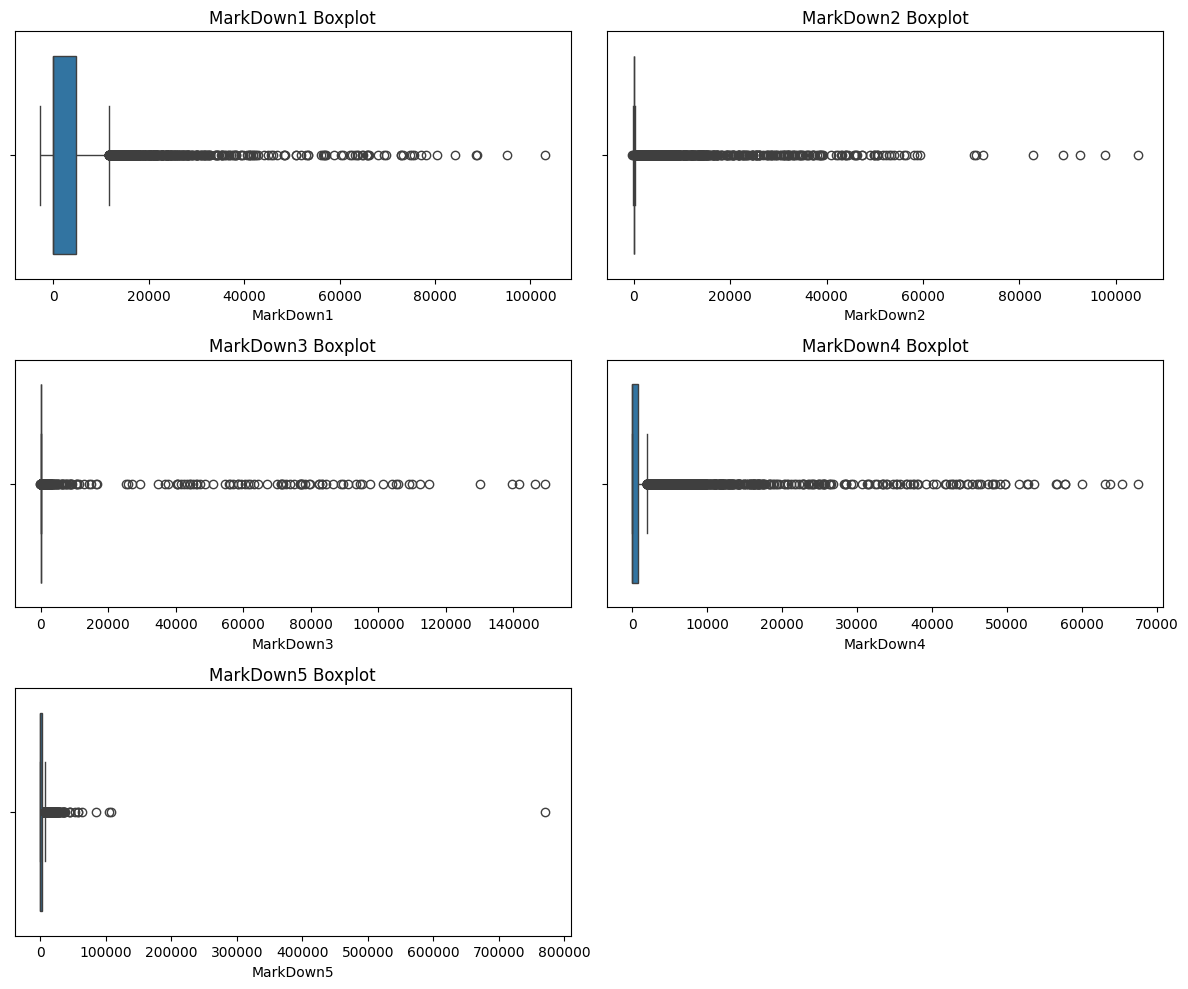

In [15]:
markdown_col = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
fig, axes = plt.subplots(3, 2, figsize = (12,10))
axes = axes.flatten()
for i, col in enumerate(markdown_col):
    sns.boxplot(data = df_features, x = col, ax = axes[i])
    axes[i].set_title(f'{col} Boxplot')

axes[-1].set_visible(False)
plt.tight_layout()
plt.show()

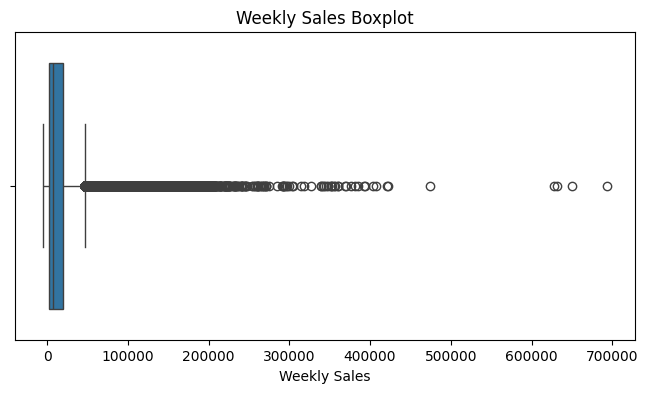

In [16]:
plt.figure(figsize = (8,4))
sns.boxplot(data=df_train, x = 'Weekly_Sales')
plt.title('Weekly Sales Boxplot')
plt.xlabel('Weekly Sales')
plt.show()

In [17]:
# markdown_col = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
# df = pd.DataFrame(data = df_features, columns = markdown_col)

# plt.figure(figsize = (15,10))
# sns.boxplot(x="variable", y="value", data=pd.melt(df))
# plt.show()

In [18]:
def find_outliers(df_features, column):
    Q1 = df_features[column].quantile(0.25)
    Q3 = df_features[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    mask = (df_features[column] < lower) | (df_features[column] > upper)
    outliers = df_features[mask]
    return outliers, lower, upper
out_rating, lower, upper  = find_outliers(df_features, 'MarkDown2')
print("MarkDown2 Outliers:", upper)

MarkDown2 Outliers: 246.475


## EDA Analysis

### Store Dataset Analysis

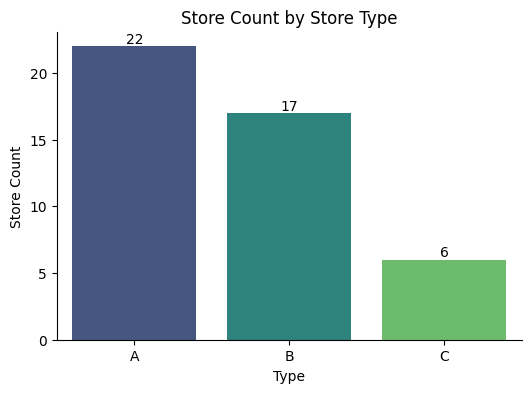

In [19]:
store_count = df_store.groupby('Type').size()
plt.figure(figsize = (6,4))
ax = sns.barplot(x =store_count.index, y = store_count.values, hue=store_count.index, legend = False, palette='viridis')
for container in ax.containers:
    ax.bar_label(container, fontsize=10);

plt.title('Store Count by Store Type')
plt.xlabel('Type')
plt.ylabel('Store Count')
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
plt.show()


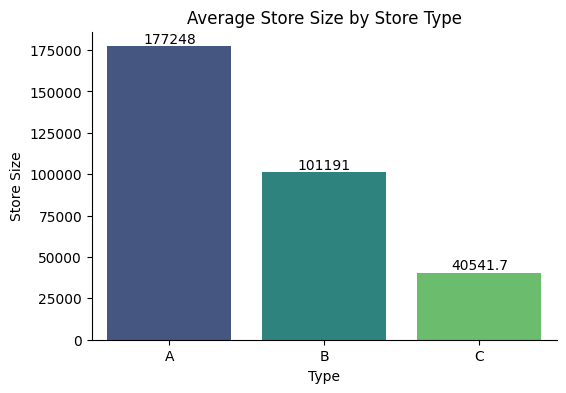

In [20]:
store_size = df_store.groupby('Type')['Size'].mean().round(2)
plt.figure(figsize = (6,4))
ax = sns.barplot(x =store_size.index, y = store_size.values, hue=store_size.index, legend = False, palette='viridis')
for container in ax.containers:
    ax.bar_label(container, fontsize=10);

plt.title('Average Store Size by Store Type')
plt.xlabel('Type')
plt.ylabel('Store Size')
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
plt.show()

### Features Dataset Analysis

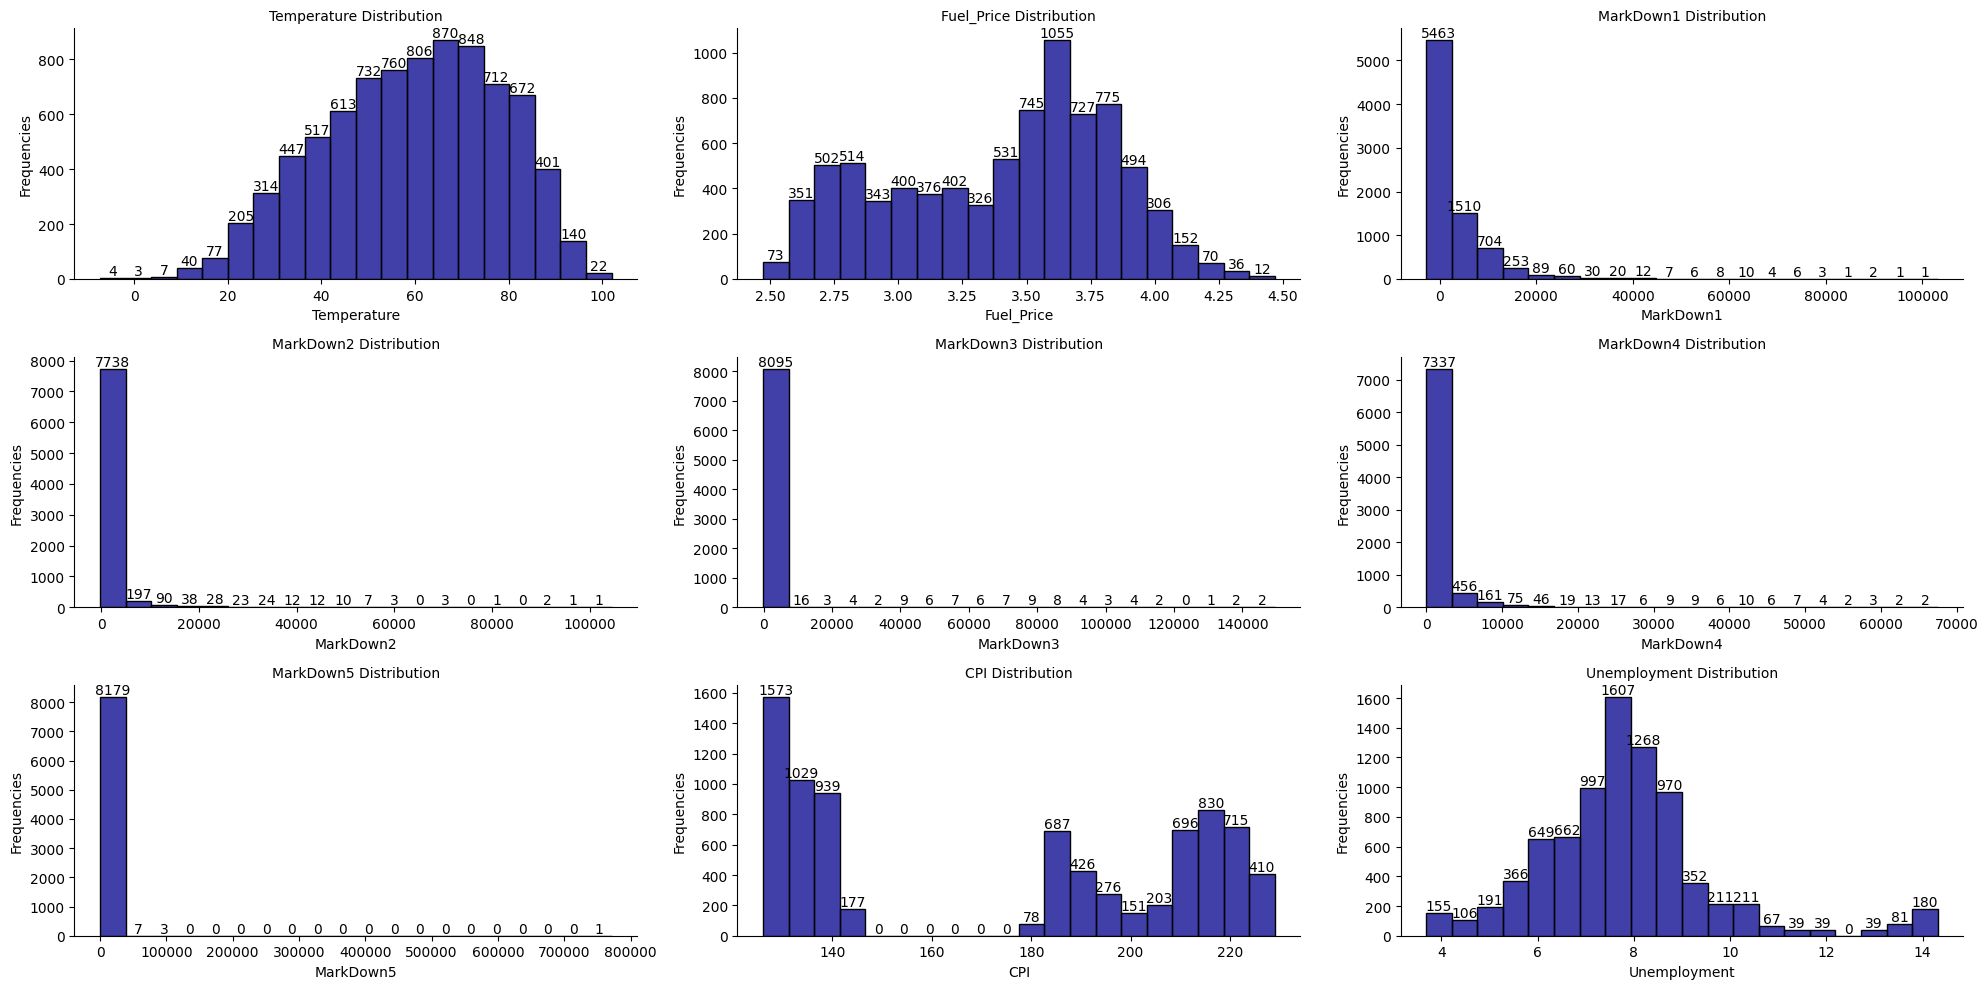

In [21]:
selected_columns = df_features.select_dtypes(include = ['float64']).columns
plt.figure(figsize = (20, 10))
for i, col in enumerate(selected_columns, 1):
    plt.subplot(3,3,i)
    ax = sns.histplot(df_features, x = col, legend = False, kde = False, bins = 20, color = 'darkblue')
    plt.title(f'{col} Distribution', fontsize = 10)
    plt.xlabel(col, fontsize  = 10)
    plt.ylabel('Frequencies', fontsize  = 10)
    for container in ax.containers:
        ax.bar_label(container, fontsize=10);
    for s in ['top', 'right']:
        ax.spines[s].set_visible(False)
    # if col == "Unemployment":
    #     plt.xlim(0, 15)
plt.tight_layout()
plt.show()


### Train Dataset Analysis

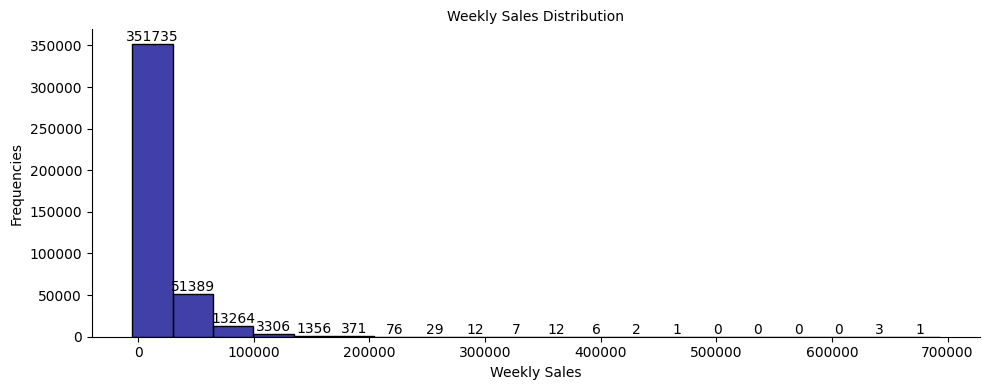

In [22]:
plt.figure(figsize = (10, 4))
ax = sns.histplot(df_train, x = 'Weekly_Sales', legend = False, kde = False, bins = 20, color = 'darkblue')
plt.title('Weekly Sales Distribution', fontsize = 10)
plt.xlabel('Weekly Sales', fontsize  = 10)
plt.ylabel('Frequencies', fontsize  = 10)
for container in ax.containers:
    ax.bar_label(container, fontsize=10);
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
plt.tight_layout()
plt.show()


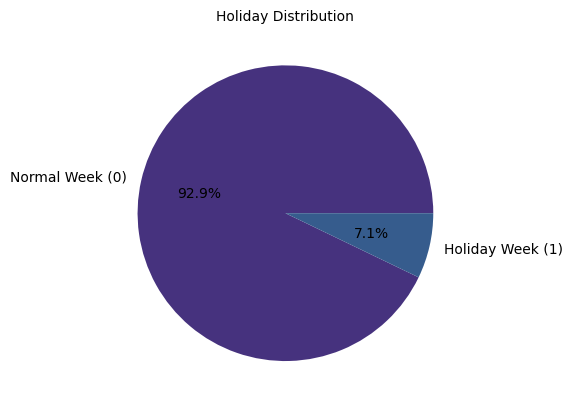

In [23]:
isHoliday = df_features['IsHoliday'].value_counts()
colors = sns.color_palette('viridis')
plt.pie(isHoliday.values, labels = ['Normal Week (0)', 'Holiday Week (1)'], colors = colors, autopct='%1.1f%%')
plt.title("Holiday Distribution", fontsize = 10)
plt.show()

## Merging Datasets

In [24]:
df = df_train.merge(df_features, on = ['Store', 'Date'], how = 'left')
df_sales = df.merge(df_store, on = 'Store', how = 'left')

In [25]:
df_sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,A,151315


In [26]:
df_sales.shape

(421570, 17)

In [27]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday_x   421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     421570 non-null  float64       
 8   MarkDown2     421570 non-null  float64       
 9   MarkDown3     421570 non-null  float64       
 10  MarkDown4     421570 non-null  float64       
 11  MarkDown5     421570 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  IsHoliday_y   421570 non-null  bool          
 15  Type          421

In [28]:
df_sales.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday_x     0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday_y     0
Type            0
Size            0
dtype: int64

In [29]:
df_sales.describe()

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,2011-06-18 08:30:31.963375104,15981.258123,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,136727.915739
min,1.000000,1.000000,2010-02-05 00:00:00,-4988.940000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2010-10-08 00:00:00,2079.650000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,2011-06-17 00:00:00,7612.030000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,2012-02-24 00:00:00,20205.852500,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,2012-10-26 00:00:00,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000
std,12.785297,30.492054,NaN,22711.183519,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,60980.583328


In [30]:
df_sales['Year']  = df_sales['Date'].dt.year
df_sales['Month']  = df_sales['Date'].dt.month
df_sales['Day']  = df_sales['Date'].dt.day
df_sales['month_name']  = df_sales['Date'].dt.month_name()

In [31]:
np.sort(df_sales['Store'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [32]:
np.sort(df_sales['Dept'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       54, 55, 56, 58, 59, 60, 65, 67, 71, 72, 74, 77, 78, 79, 80, 81, 82,
       83, 85, 87, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], dtype=int64)

In [33]:
print(df_sales['Store'].nunique())
print(df_sales['Dept'].nunique())

45
81


In [34]:
df_sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size,Year,Month,Day,month_name
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,...,0.0,211.096358,8.106,False,A,151315,2010,2,5,February
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,...,0.0,211.242170,8.106,True,A,151315,2010,2,12,February
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,...,0.0,211.289143,8.106,False,A,151315,2010,2,19,February
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,...,0.0,211.319643,8.106,False,A,151315,2010,2,26,February
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,...,0.0,211.350143,8.106,False,A,151315,2010,3,5,March


In [35]:
def value_formatter(x, pos):
    if x >= 1000000:
        return f'{x/1000000:.1f}M'
    elif x>=1000:
        return f'{x/1000:.1f}K'
    else:
        return int(x)

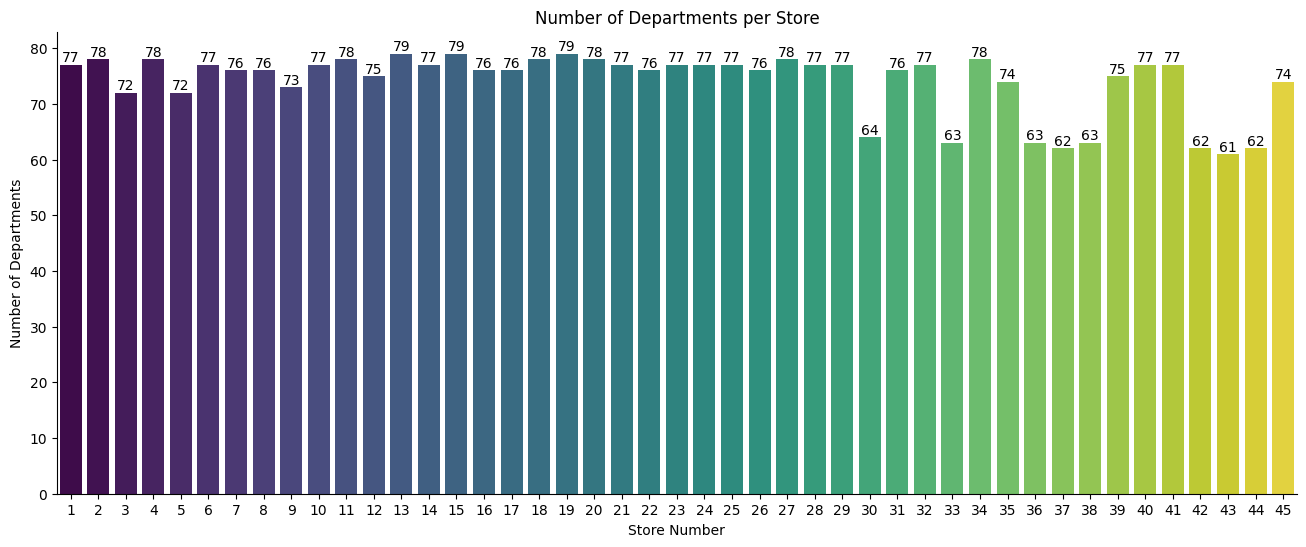

In [36]:
dept_num = df_sales.groupby('Store')['Dept'].nunique()
plt.figure(figsize = (16,6))
ax = sns.barplot(x = dept_num.index, y = dept_num.values, hue=dept_num.index, legend = False, palette='viridis')
for container in ax.containers:
    ax.bar_label(container, fontsize=10);

plt.title('Number of Departments per Store')
plt.xlabel('Store Number')
plt.ylabel('Number of Departments')
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
plt.show()

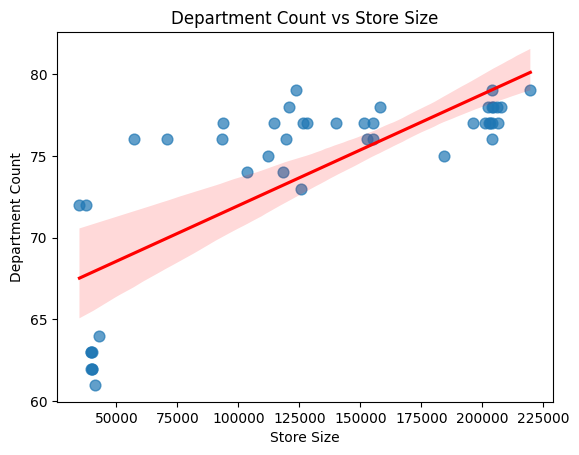

In [37]:
compare = df_store.merge(dept_num, left_on = 'Store', right_index = True)
sns.regplot(data = compare, x = 'Size', y = 'Dept', scatter_kws = {'s':60, 'alpha': 0.7}, line_kws = {'color':'red'})
plt.title('Department Count vs Store Size')
plt.xlabel('Store Size')
plt.ylabel('Department Count')
plt.show()


In [38]:
df_sales.groupby('Type')['Dept'].nunique()

Type
A    81
B    80
C    66
Name: Dept, dtype: int64

In [39]:
df_sales.groupby(['Type', 'Store'])['Dept'].value_counts().reset_index(name = 'Sales_Records').sort_values(by = 'Sales_Records', ascending = False)

,Type,Store,Dept,Sales_Records
0,A,1,1,143
1900,B,9,38,143
1892,B,9,27,143
1893,B,9,29,143
1894,B,9,30,143
...,...,...,...,...
2115,B,12,99,1
2193,B,15,99,1
2194,B,15,37,1
232,A,4,39,1


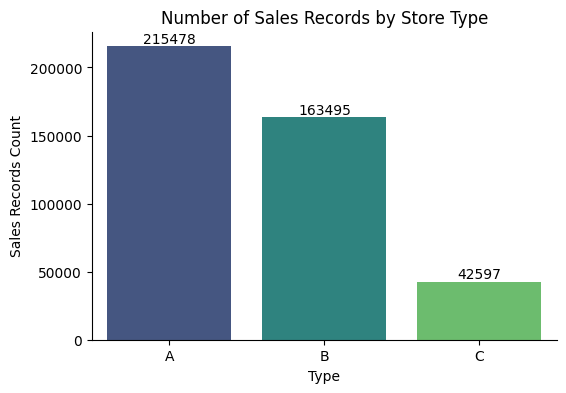

In [40]:
sales_records = df_sales.groupby('Type').size()
plt.figure(figsize = (6,4))
ax = sns.barplot(x =sales_records.index, y = sales_records.values, hue=sales_records.index, legend = False, palette='viridis')
for container in ax.containers:
    ax.bar_label(container, fontsize=10);

plt.title('Number of Sales Records by Store Type')
plt.xlabel('Type')
plt.ylabel('Sales Records Count')
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
plt.show()


In [41]:
df_sales.groupby(['Type','Store','Dept'])['Weekly_Sales'].sum()

Type  Store  Dept
A     1      1       3219405.18
             2       6592598.93
             3       1880518.36
             4       5285874.09
             5       3468885.58
                        ...    
C     44     95      4447326.48
             96       405281.96
             97       949014.84
             98       495649.02
             99            7.01
Name: Weekly_Sales, Length: 3331, dtype: float64

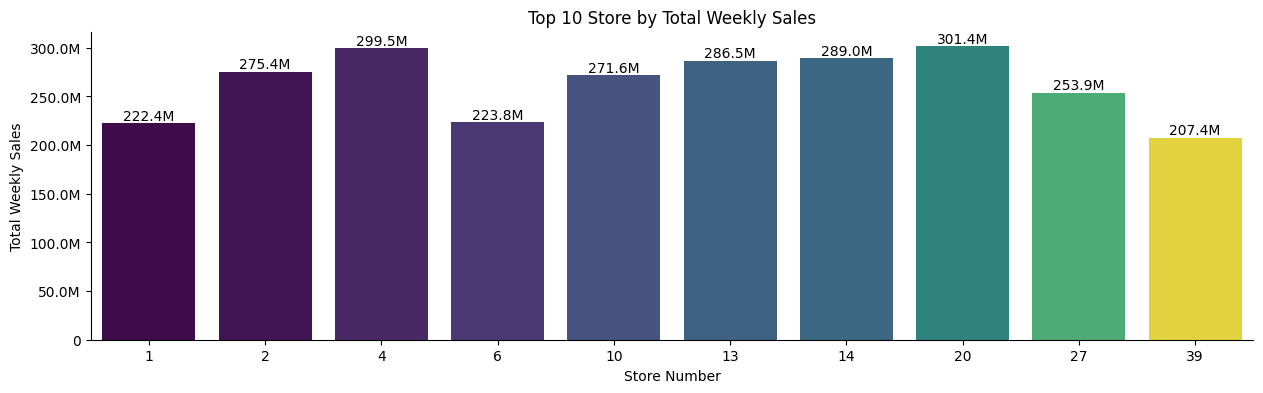

In [42]:
top10_store = df_sales.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending = False).reset_index().head(10)
plt.figure(figsize = (15,4))
ax = sns.barplot(x =top10_store['Store'], y = top10_store['Weekly_Sales'], hue=top10_store['Store'], legend = False, palette='viridis')
ax.yaxis.set_major_formatter(FuncFormatter(value_formatter))
for container in ax.containers:
    labels = [value_formatter(v, i) for i, v in enumerate(container.datavalues)]
    ax.bar_label(container, labels = labels, fontsize=10);

plt.title('Top 10 Store by Total Weekly Sales')
plt.xlabel('Store Number')
plt.ylabel('Total Weekly Sales')
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
plt.show()

In [43]:
top10store_weekly_sales = df_sales[df_sales['Store'].isin(top10_store['Store'])].groupby(['Store', 'Date'])['Weekly_Sales'].sum().reset_index()
top10store_weekly_sales

,Store,Date,Weekly_Sales
0,1,2010-02-05,1643690.90
1,1,2010-02-12,1641957.44
2,1,2010-02-19,1611968.17
3,1,2010-02-26,1409727.59
4,1,2010-03-05,1554806.68
...,...,...,...
1425,39,2012-09-28,1495607.07
1426,39,2012-10-05,1574408.67
1427,39,2012-10-12,1494417.07
1428,39,2012-10-19,1577486.33


Text(0, 0.5, 'Total Weekly Sales')

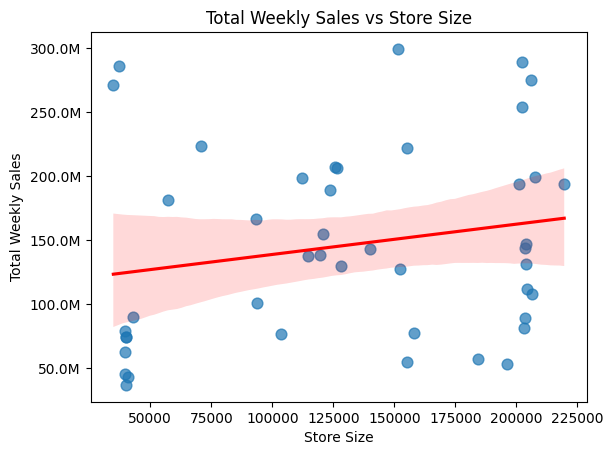

In [44]:
top_store = df_sales.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending = False).reset_index()
compare = df_store.merge(top_store, left_on = 'Store', right_index = True)
ax = sns.regplot(data = compare, x = 'Size', y = 'Weekly_Sales', scatter_kws = {'s':60, 'alpha': 0.7}, line_kws = {'color':'red'})
ax.yaxis.set_major_formatter(FuncFormatter(value_formatter))
plt.title('Total Weekly Sales vs Store Size')
plt.xlabel('Store Size')
plt.ylabel('Total Weekly Sales')

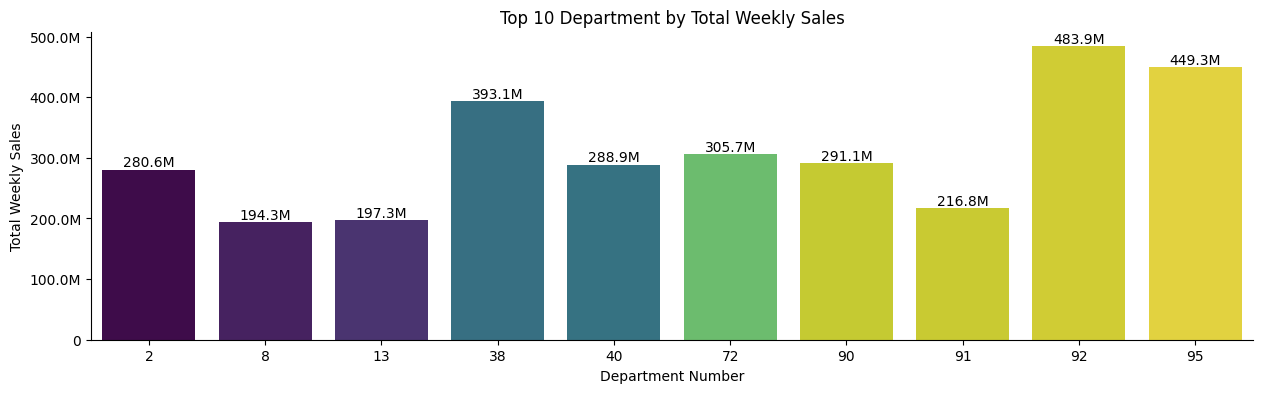

In [45]:
top10_dept = df_sales.groupby('Dept')['Weekly_Sales'].sum().sort_values(ascending = False).reset_index().head(10)
plt.figure(figsize = (15,4))
ax = sns.barplot(x =top10_dept['Dept'], y = top10_dept['Weekly_Sales'], hue=top10_dept['Dept'], legend = False, palette='viridis')
ax.yaxis.set_major_formatter(FuncFormatter(value_formatter))
for container in ax.containers:
    labels = [value_formatter(v, i) for i,v in enumerate(container.datavalues)]
    ax.bar_label(container, labels = labels, fontsize=10);

plt.title('Top 10 Department by Total Weekly Sales')
plt.xlabel('Department Number')
plt.ylabel('Total Weekly Sales')
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
plt.show()


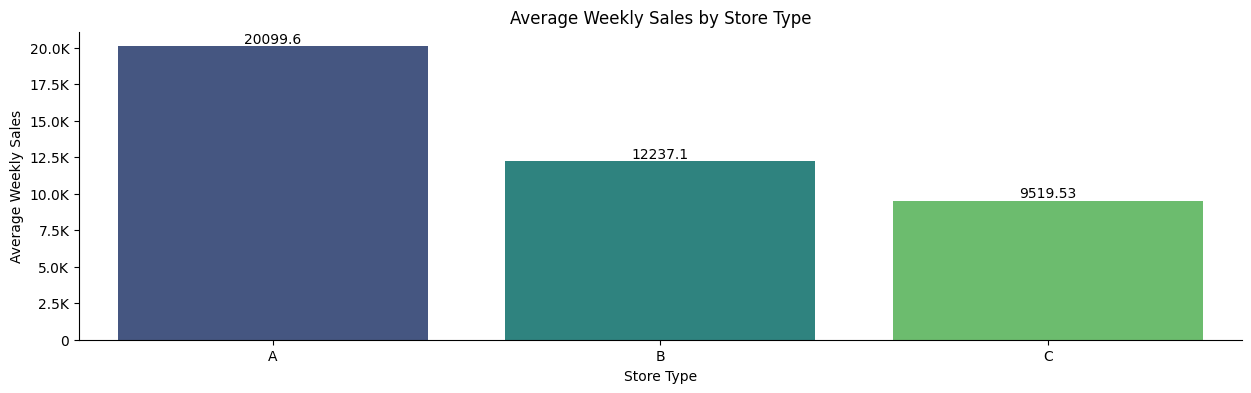

In [46]:
type_sales = df_sales.groupby('Type')['Weekly_Sales'].mean().sort_values(ascending = False).reset_index()
plt.figure(figsize = (15,4))
ax = sns.barplot(x =type_sales['Type'], y = type_sales['Weekly_Sales'], hue=type_sales['Type'], legend = False, palette='viridis')
ax.yaxis.set_major_formatter(FuncFormatter(value_formatter))
for container in ax.containers:
    ax.bar_label(container, fontsize=10);

plt.title('Average Weekly Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Average Weekly Sales')
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
plt.show()


In [47]:
df_sales[df_sales['Store'].isin(top10_store['Store'])].groupby('Store')['Dept'].nunique()

Store
1     77
2     78
4     78
6     77
10    77
13    79
14    77
20    78
27    78
39    75
Name: Dept, dtype: int64

In [48]:
df_sales[df_sales['Store'].isin(top10_store['Store'])].groupby('Store')['Size'].first()

Store
1     151315
2     202307
4     205863
6     202505
10    126512
13    219622
14    200898
20    203742
27    204184
39    184109
Name: Size, dtype: int64

In [49]:
def get_seasons(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3,4,5]:
        return 'Spring'
    elif month in [6,7,8]:
        return 'Summer'
    else:
        return 'Fall'
df_sales['Season'] = df_sales['Month'].apply(get_seasons)

In [50]:
monthly_sales = df_sales.groupby(['Year', 'Month'])['Weekly_Sales'].sum().reset_index()
monthly_sales.head()

,Year,Month,Weekly_Sales
0,2010,2,1.903330e+08
1,2010,3,1.819198e+08
2,2010,4,2.314124e+08
3,2010,5,1.867109e+08
4,2010,6,1.922462e+08


In [51]:
yearly_sales = df_sales.groupby(['Year'])['Weekly_Sales'].sum().reset_index()
yearly_sales

,Year,Weekly_Sales
0,2010,2.288886e+09
1,2011,2.448200e+09
2,2012,2.000133e+09


Text(0.5, 1.0, 'Total Sales by Month vs Year Heatmap')

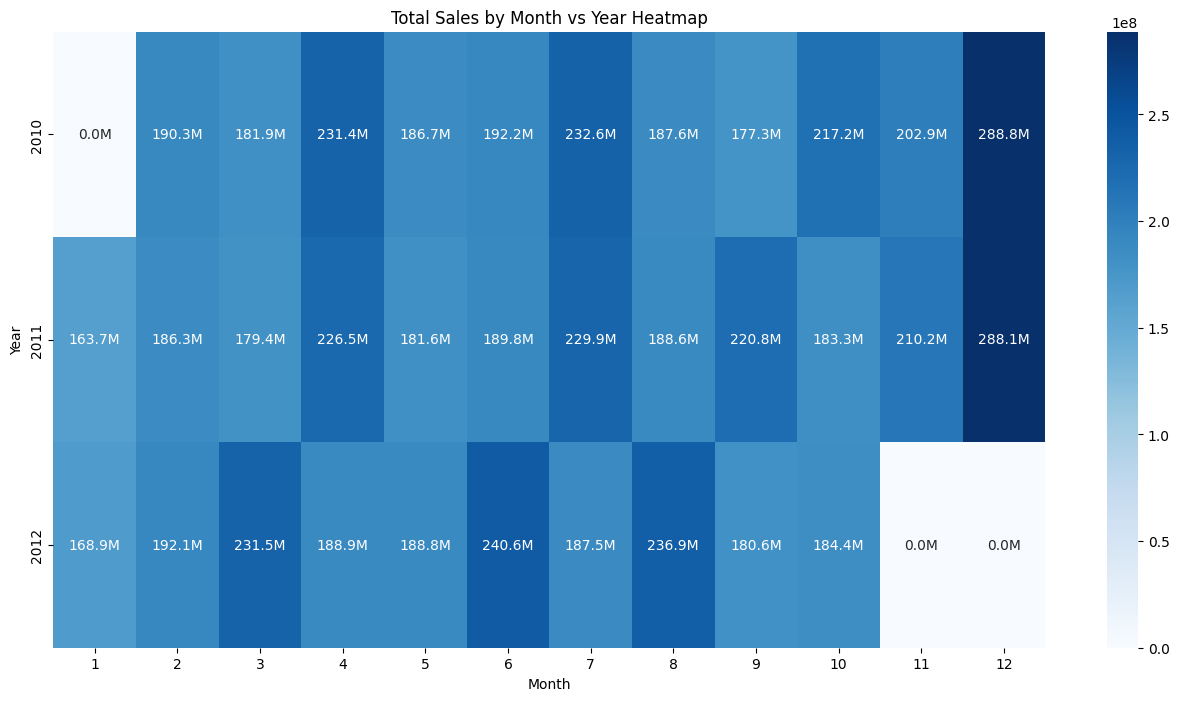

In [52]:
heatmap_pivot = monthly_sales.pivot(index = 'Year', columns = 'Month', values = 'Weekly_Sales').fillna(0)
plt.figure(figsize =(16,8))
annot_matrix = heatmap_pivot.map(lambda x: f"{x/1e6:.1f}M")
ax = sns.heatmap(heatmap_pivot, annot=annot_matrix, fmt = '', cmap= 'Blues', annot_kws={"fontsize": 10} )
plt.title('Total Sales by Month vs Year Heatmap')

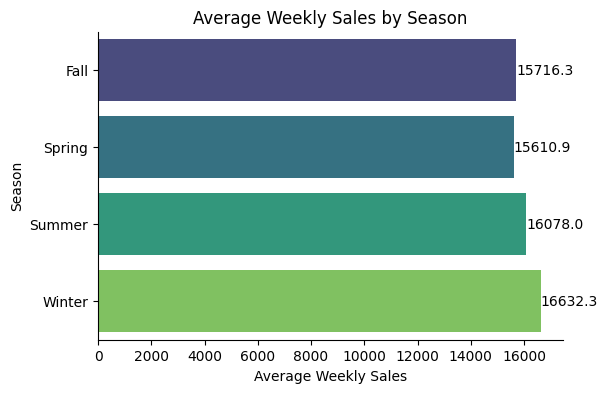

In [53]:
average_seasons_sales = df_sales.groupby(['Season'])['Weekly_Sales'].mean().reset_index()
plt.figure(figsize = (6,4))
ax = sns.barplot(x =average_seasons_sales['Weekly_Sales'], y = average_seasons_sales['Season'], hue=average_seasons_sales['Season'], legend = False, palette='viridis')
for container in ax.containers:
    ax.bar_label(container, fontsize=10, fmt="%.1f");

plt.title('Average Weekly Sales by Season')
plt.xlabel('Average Weekly Sales')
plt.ylabel('Season')
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
plt.show()

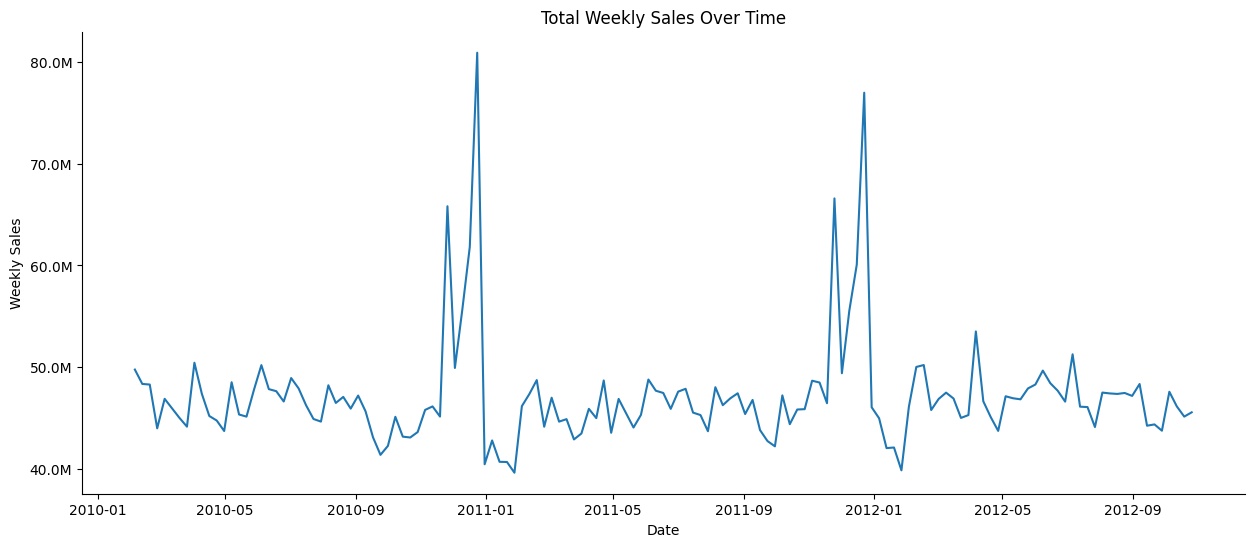

In [54]:
weekly_sum = df_sales.groupby('Date')['Weekly_Sales'].sum().reset_index()
plt.figure(figsize = (15,6))
ax = sns.lineplot(data = weekly_sum, x = 'Date', y = 'Weekly_Sales')
ax.yaxis.set_major_formatter(FuncFormatter(value_formatter))
plt.title('Total Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
plt.show()

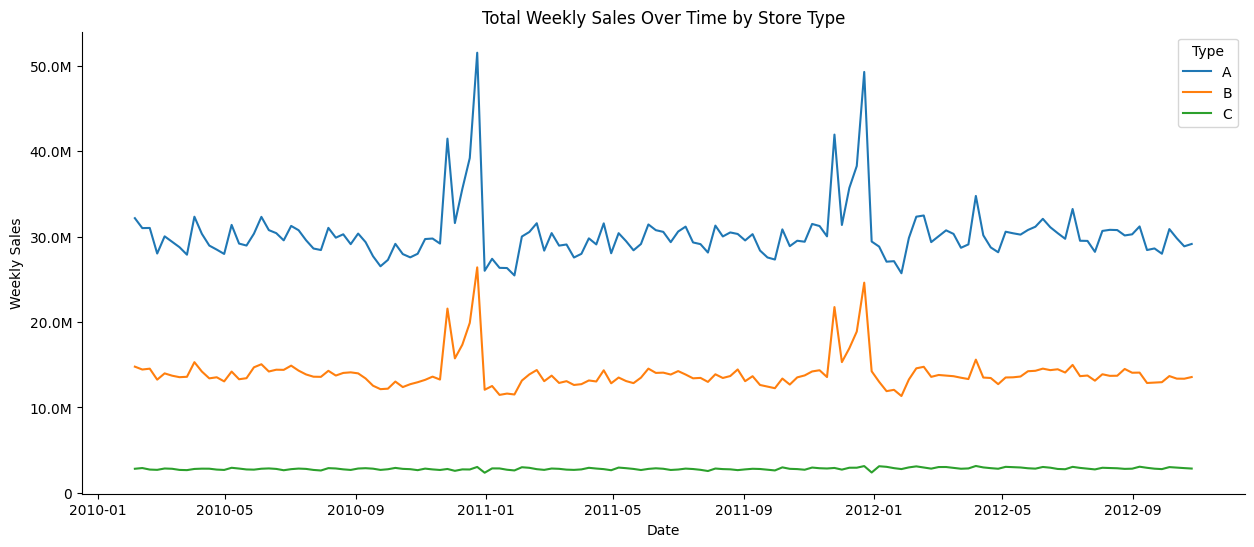

In [55]:
weekly_type = df_sales.groupby(['Type','Date'])['Weekly_Sales'].sum().reset_index()
plt.figure(figsize = (15,6))
ax = sns.lineplot(data = weekly_type, x = 'Date', y = 'Weekly_Sales', hue = 'Type')
ax.yaxis.set_major_formatter(FuncFormatter(value_formatter))
plt.title('Total Weekly Sales Over Time by Store Type')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
plt.show()

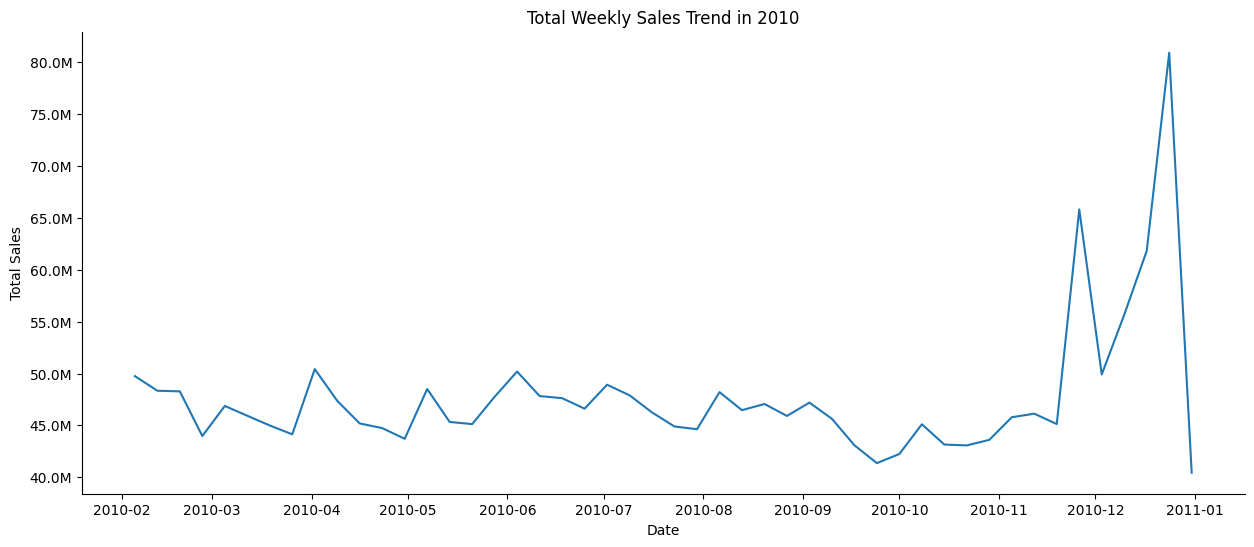

In [56]:
weekly_2010 = df_sales[df_sales['Year'] == 2010].groupby('Date')['Weekly_Sales'].sum().reset_index()
plt.figure(figsize = (15,6))
ax = sns.lineplot(data = weekly_2010, x = 'Date', y = 'Weekly_Sales')
ax.yaxis.set_major_formatter(FuncFormatter(value_formatter))
plt.title('Total Weekly Sales Trend in 2010')
plt.xlabel('Date')
plt.ylabel('Total Sales')
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
plt.show()

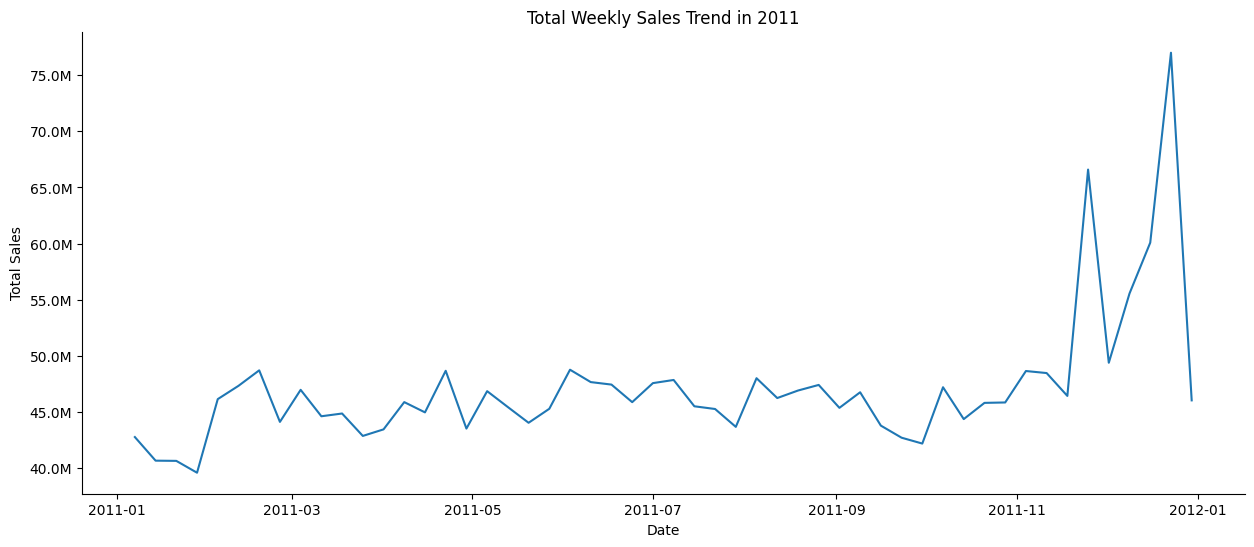

In [57]:
weekly_2011 = df_sales[df_sales['Year'] == 2011].groupby('Date')['Weekly_Sales'].sum().reset_index()
plt.figure(figsize = (15,6))
ax = sns.lineplot(data = weekly_2011, x = 'Date', y = 'Weekly_Sales')
ax.yaxis.set_major_formatter(FuncFormatter(value_formatter))
plt.title('Total Weekly Sales Trend in 2011')
plt.xlabel('Date')
plt.ylabel('Total Sales')
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
plt.show()

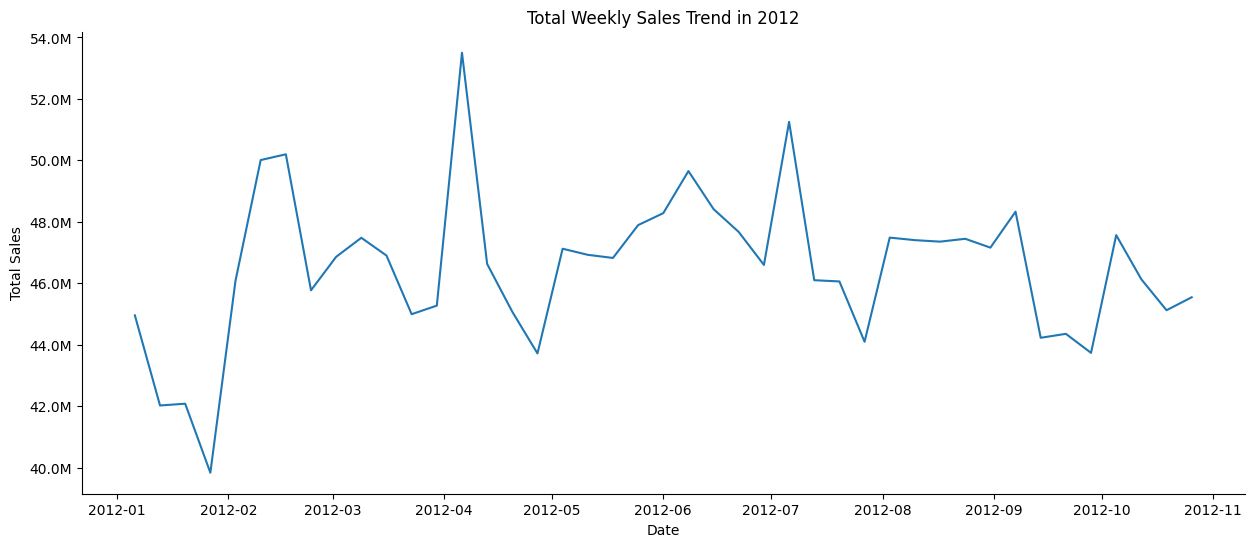

In [58]:
weekly_2012 = df_sales[df_sales['Year'] == 2012].groupby('Date')['Weekly_Sales'].sum().reset_index()
plt.figure(figsize = (15,6))
ax = sns.lineplot(data = weekly_2012, x = 'Date', y = 'Weekly_Sales')
ax.yaxis.set_major_formatter(FuncFormatter(value_formatter))
plt.title('Total Weekly Sales Trend in 2012')
plt.xlabel('Date')
plt.ylabel('Total Sales')
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
plt.show()

In [59]:
holiday_sales = df_sales[df_sales['IsHoliday_x'] == True]
holiday_sales.shape[0]

29661

In [60]:
nonholiday_sales = df_sales[df_sales['IsHoliday_x'] == False]
nonholiday_sales.shape[0]

391909

In [61]:
holiday_sales.groupby(['Store']).size().head()

Store
1    723
2    722
3    633
4    727
5    640
dtype: int64

In [62]:
holiday_sales.groupby(['Store'])['Weekly_Sales'].sum().sort_values(ascending = False).head(10)

Store
20    22490350.81
4     22431026.24
14    21205829.98
10    21137559.49
13    21130438.06
2     20792669.00
27    18922992.78
6     16809079.27
1     16657476.56
19    15770467.34
Name: Weekly_Sales, dtype: float64

In [63]:
holiday_sales['Weekly_Sales'].sum()

505299551.56

In [64]:
nonholiday_sales.groupby(['Store']).size().head()

Store
1    9521
2    9516
3    8403
4    9545
5    8359
dtype: int64

In [65]:
nonholiday_sales.groupby(['Store'])['Weekly_Sales'].sum().sort_values(ascending = False).head(10)

Store
20    2.789074e+08
4     2.771129e+08
14    2.677941e+08
13    2.653873e+08
2     2.545898e+08
10    2.504802e+08
27    2.349329e+08
6     2.069471e+08
1     2.057453e+08
39    1.919343e+08
Name: Weekly_Sales, dtype: float64

In [66]:
nonholiday_sales['Weekly_Sales'].sum()

6231919435.55

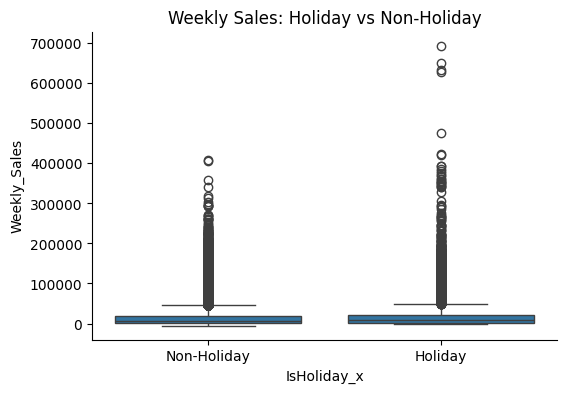

In [67]:
plt.figure(figsize = (6,4))
ax = sns.boxplot(data = df_sales, x = 'IsHoliday_x', y = 'Weekly_Sales')
plt.xticks([0,1],['Non-Holiday', 'Holiday'])
plt.title('Weekly Sales: Holiday vs Non-Holiday')
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
plt.show()

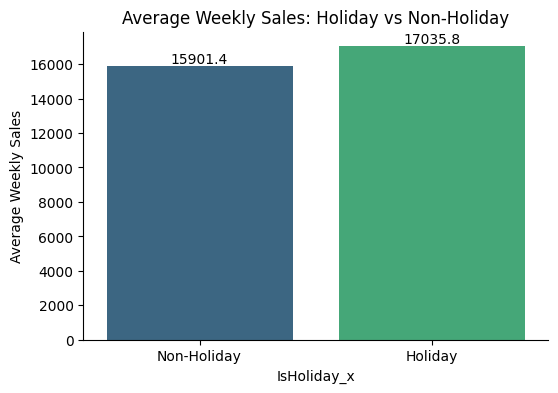

In [68]:
mean_sales = df_sales.groupby('IsHoliday_x')['Weekly_Sales'].mean()
plt.figure(figsize = (6,4))
ax = sns.barplot(x =mean_sales.index, y = mean_sales.values, hue=mean_sales.index, legend = False, palette='viridis')
for container in ax.containers:
    ax.bar_label(container, fontsize=10);

plt.title('Average Weekly Sales: Holiday vs Non-Holiday')
plt.xticks([0,1], ['Non-Holiday', 'Holiday'])
plt.ylabel('Average Weekly Sales')
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
plt.show()

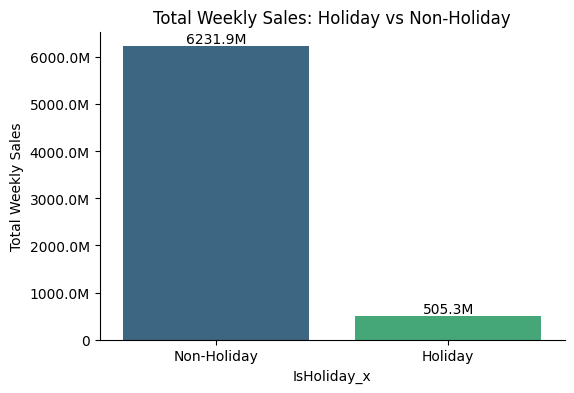

In [69]:
total_sales = df_sales.groupby('IsHoliday_x')['Weekly_Sales'].sum()
plt.figure(figsize = (6,4))
ax = sns.barplot(x =total_sales.index, y = total_sales.values, hue=total_sales.index, legend = False, palette='viridis')
ax.yaxis.set_major_formatter(FuncFormatter(value_formatter))

for container in ax.containers:
    labels = [value_formatter(v, i) for i,v in enumerate(container.datavalues)]
    ax.bar_label(container, fontsize=10, labels = labels);

plt.title('Total Weekly Sales: Holiday vs Non-Holiday')
plt.xticks([0,1], ['Non-Holiday', 'Holiday'])
plt.ylabel('Total Weekly Sales')
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
plt.show()


In [70]:
month_order = ['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']
df_sales['month_name'] = pd.Categorical(df_sales['month_name'], categories= month_order, ordered = True)

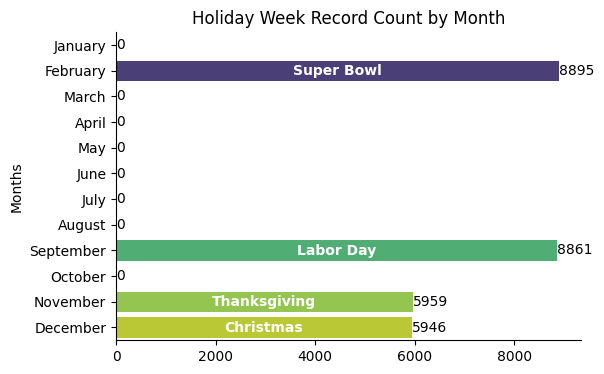

In [71]:
holiday_month = df_sales[df_sales['IsHoliday_x'] == True]['month_name'].value_counts().sort_index()
plt.figure(figsize = (6,4))
ax = sns.barplot(x =holiday_month.values, y = holiday_month.index, hue=holiday_month.index, legend = False, palette='viridis')
for container in ax.containers:
    ax.bar_label(container, fontsize=10);
holiday_names = {
    'February': 'Super Bowl',
    'September': 'Labor Day',
    'November': 'Thanksgiving',
    'December': 'Christmas'
}
for i, (value, month) in enumerate(zip(holiday_month.values, holiday_month.index)):
    label = holiday_names.get(month, '')
    ax.text(
        value * 0.5,       
        i,                 
        label,            
        ha='center',        
        va='center',      
        color='white',      
        fontsize=10,
        fontweight='bold'
    )
plt.title('Holiday Week Record Count by Month')
plt.ylabel('Months')
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
plt.show()

- Super Bowl: February
- Labor Day: September
- Thanksgiving: November
- Christmas: December

In [72]:
df_sales[df_sales['IsHoliday_x'] == True][['Year','month_name','Day']].value_counts().reset_index().sort_values(by = ['Year', 'month_name'])

,Year,month_name,Day,count
5,2010,February,12,2956
9,2010,September,10,2937
7,2010,November,26,2938
6,2010,December,31,2943
8,2011,February,11,2938
4,2011,September,9,2958
0,2011,November,25,3021
1,2011,December,30,3003
2,2012,February,10,3001
3,2012,September,7,2966


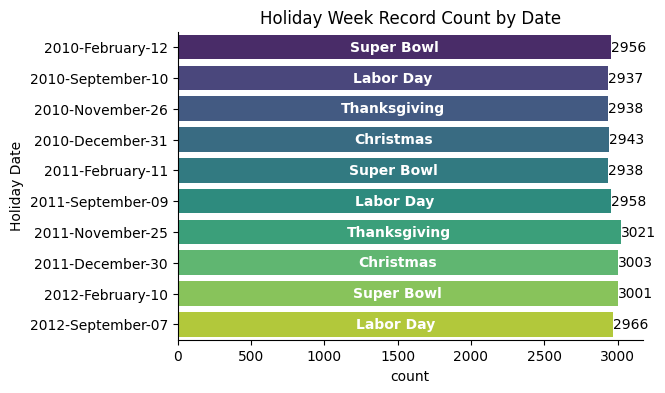

In [94]:
holiday_info = df_sales[df_sales['IsHoliday_x'] == True][['Date', 'month_name']].value_counts().reset_index().sort_values(by = ['Date'])
holiday_info['label_date'] = holiday_info['Date'].dt.strftime('%Y-%B-%d') 
plt.figure(figsize = (6,4))
ax = sns.barplot(x =holiday_info['count'], y = holiday_info['label_date'], hue=holiday_info['label_date'], legend = False, palette='viridis')
for container in ax.containers:
    ax.bar_label(container, fontsize=10);
holiday_names = {
    'February': 'Super Bowl',
    'September': 'Labor Day',
    'November': 'Thanksgiving',
    'December': 'Christmas'
}
for y_pos, row in enumerate(holiday_info.itertuples()):
    value = row.count
    month = row.month_name
    label = holiday_names.get(month, '')
    if label:
        ax.text(
            value * 0.5,
            y_pos,
            label,
            ha='center',
            va='center',
            color='white',
            fontsize=10,
            fontweight='bold'
        )
plt.title('Holiday Week Record Count by Date')
plt.ylabel('Holiday Date')
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
plt.show()

In [74]:
bins = [-10, 20, 40, 60, 80, 100, 120]
labels=['<20', '20-40', '40-60', '60-80', '80-100', '100+']
df_sales['tem_bin'] = pd.cut(df_sales['Temperature'], labels = labels, bins = bins)

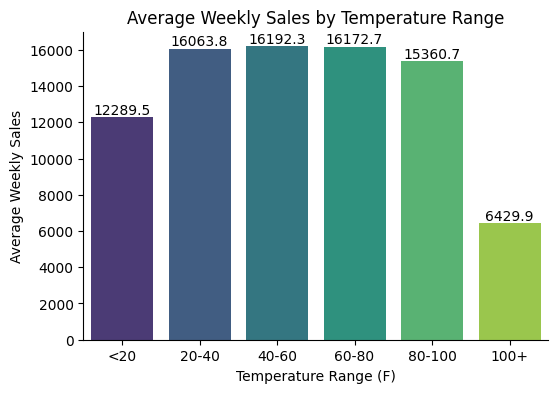

In [75]:
temp_effect = df_sales.groupby('tem_bin', observed = True)['Weekly_Sales'].mean()
plt.figure(figsize = (6,4))
ax = sns.barplot(x =temp_effect.index, y = temp_effect.values, hue=temp_effect.index, legend = False, palette='viridis')
for container in ax.containers:
    ax.bar_label(container, fontsize=10);

plt.title('Average Weekly Sales by Temperature Range')
plt.xlabel('Temperature Range (F)')
plt.ylabel('Average Weekly Sales')
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
plt.show()

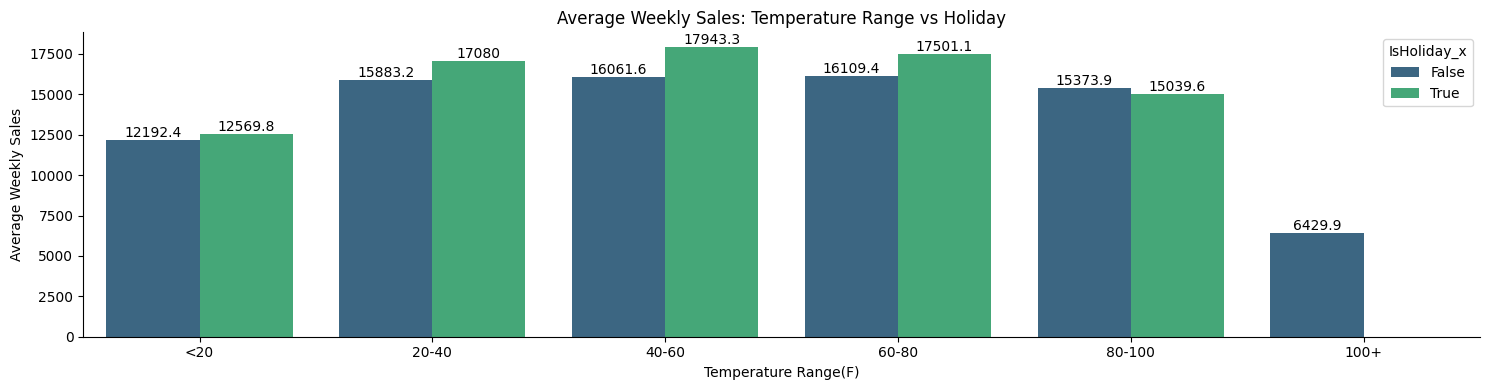

In [76]:
temp_holiday = df_sales.groupby(['tem_bin', 'IsHoliday_x'], observed = True)['Weekly_Sales'].mean().reset_index()
plt.figure(figsize=(15,4))
ax = sns.barplot(
    data=temp_holiday,
    x='tem_bin',
    y='Weekly_Sales',
    hue='IsHoliday_x',
    palette='viridis'
    )
for container in ax.containers:
    ax.bar_label(container, fontsize=10);

plt.title('Average Weekly Sales: Temperature Range vs Holiday')
plt.xlabel('Temperature Range(F)')
plt.ylabel('Average Weekly Sales')
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
plt.tight_layout()
plt.show()

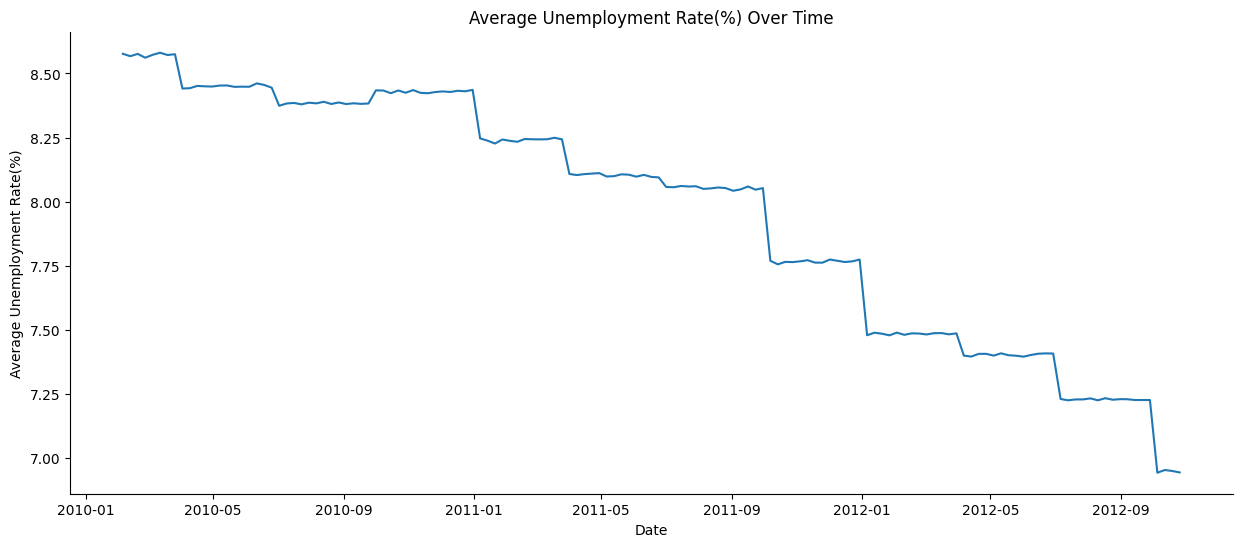

In [77]:
unemployment_mean = df_sales.groupby('Date')['Unemployment'].mean().reset_index()
plt.figure(figsize = (15,6))
ax = sns.lineplot(data = unemployment_mean, x = 'Date', y = 'Unemployment')
plt.title('Average Unemployment Rate(%) Over Time')
plt.xlabel('Date')
plt.ylabel('Average Unemployment Rate(%)')
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
plt.show()

In [78]:
bins = [0, 4, 6, 8, 10, 12, 15]
labels=['0-4%', '4-6%', '6-8%', '8-10%', '10-12%', '12-15%']
df_sales['unemp_bin'] = pd.cut(df_sales['Unemployment'], labels = labels, bins = bins)

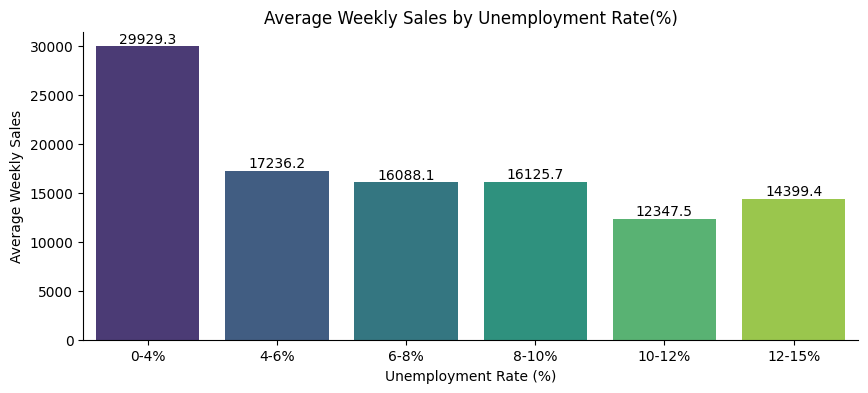

In [79]:
unemp_effect = df_sales.groupby('unemp_bin', observed = True)['Weekly_Sales'].mean()
plt.figure(figsize = (10,4))
ax = sns.barplot(x =unemp_effect.index, y = unemp_effect.values, hue=unemp_effect.index, legend = False, palette='viridis')
for container in ax.containers:
    ax.bar_label(container, fontsize=10);

plt.title('Average Weekly Sales by Unemployment Rate(%)')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Average Weekly Sales')
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
plt.show()

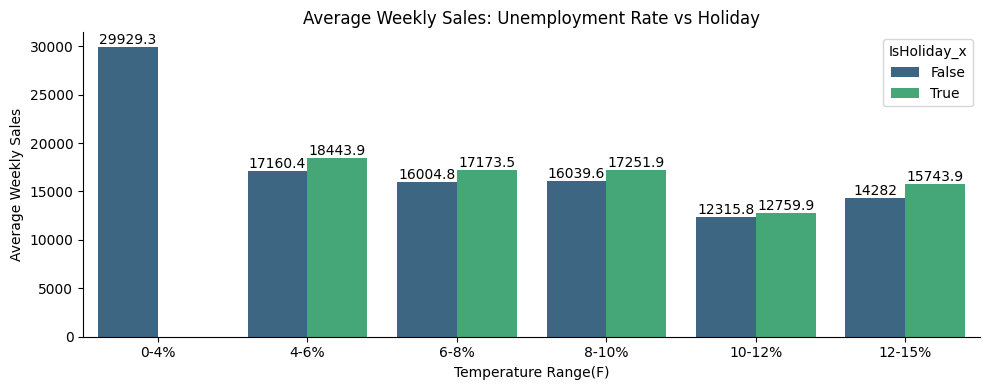

In [80]:
unemp_holiday = df_sales.groupby(['unemp_bin', 'IsHoliday_x'], observed = True)['Weekly_Sales'].mean().reset_index()
plt.figure(figsize=(10,4))
ax = sns.barplot(
    data=unemp_holiday,
    x='unemp_bin',
    y='Weekly_Sales',
    hue='IsHoliday_x',
    palette='viridis'
    )
for container in ax.containers:
    ax.bar_label(container, fontsize=10);
plt.title('Average Weekly Sales: Unemployment Rate vs Holiday')
plt.xlabel('Temperature Range(F)')
plt.ylabel('Average Weekly Sales')
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
plt.tight_layout()
plt.show()

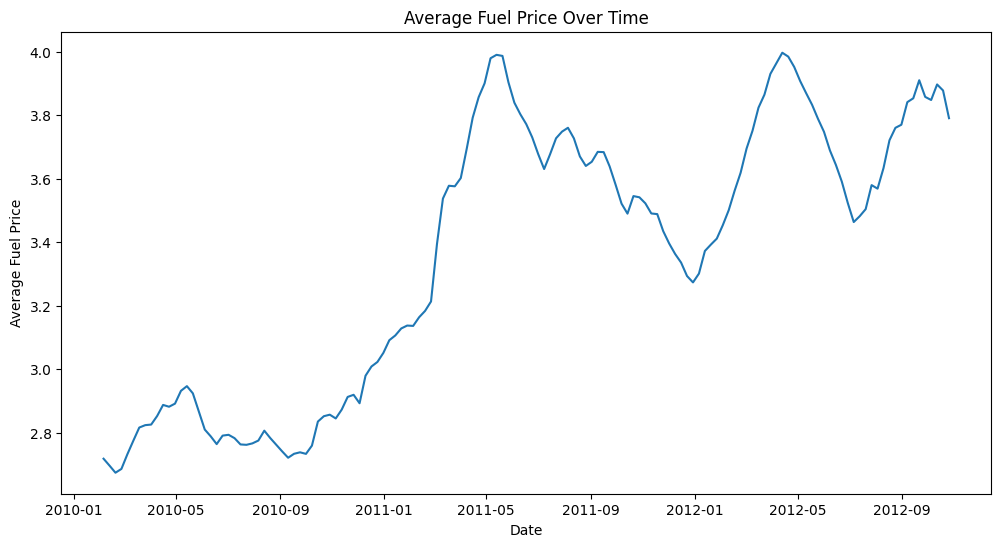

In [81]:
fuel_mean = df_sales.groupby('Date')['Fuel_Price'].mean().reset_index()
plt.figure(figsize = (12,6))
sns.lineplot(data = fuel_mean, x = 'Date', y = 'Fuel_Price')
plt.title('Average Fuel Price Over Time')
plt.xlabel('Date')
plt.ylabel('Average Fuel Price')
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
plt.show()

In [82]:
bins=[0, 2.75, 3.00, 3.25, 3.50, 3.75, 4.00, 5.00]
labels=['<2.75','2.75–3.00','3.00–3.25','3.25–3.50','3.50–3.75','3.75–4.00','4.00+']
df_sales['fuel_bin'] = pd.cut(df_sales['Fuel_Price'], labels = labels, bins = bins)

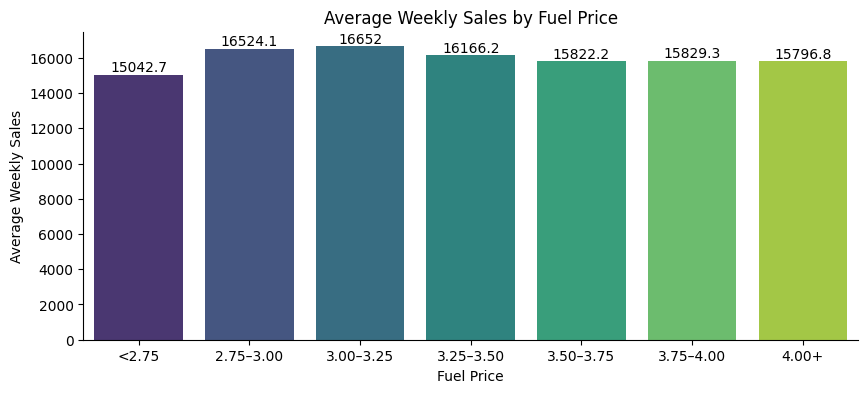

In [83]:
fuel_effect = df_sales.groupby('fuel_bin', observed = True)['Weekly_Sales'].mean()
plt.figure(figsize = (10,4))
ax = sns.barplot(x =fuel_effect.index, y = fuel_effect.values, hue=fuel_effect.index, legend = False, palette='viridis')
for container in ax.containers:
    ax.bar_label(container, fontsize=10);

plt.title('Average Weekly Sales by Fuel Price')
plt.xlabel('Fuel Price')
plt.ylabel('Average Weekly Sales')
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
plt.show()

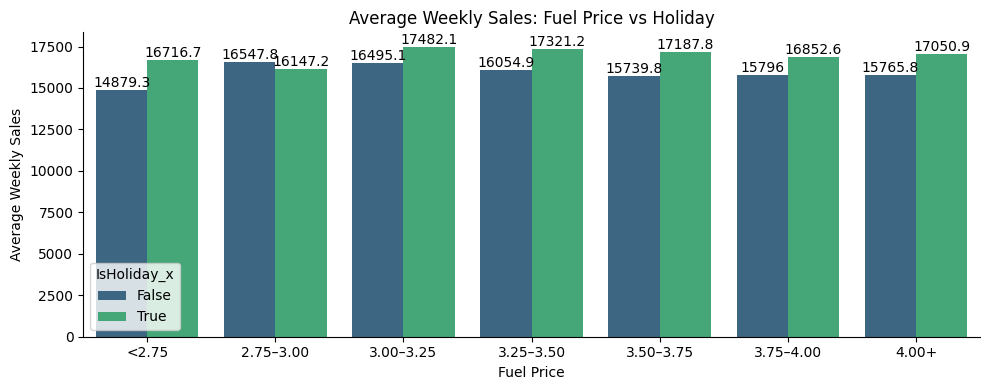

In [84]:
fuel_holiday = df_sales.groupby(['fuel_bin', 'IsHoliday_x'], observed = True)['Weekly_Sales'].mean().reset_index()
plt.figure(figsize=(10,4))
ax = sns.barplot(
    data=fuel_holiday,
    x='fuel_bin',
    y='Weekly_Sales',
    hue='IsHoliday_x',
    palette='viridis'
    )
for container in ax.containers:
    ax.bar_label(container, fontsize=10);
plt.title('Average Weekly Sales: Fuel Price vs Holiday')
plt.xlabel('Fuel Price')
plt.ylabel('Average Weekly Sales')
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
plt.tight_layout()
plt.show()

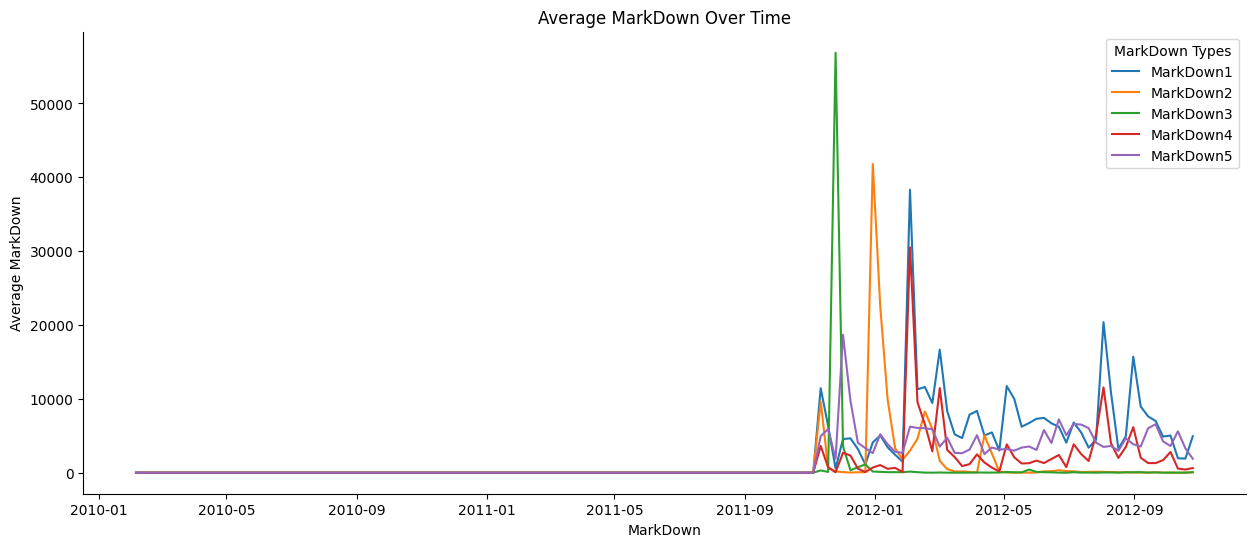

In [85]:
mrkd_mean = df_sales.groupby('Date')[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].mean().reset_index()
plt.figure(figsize = (15,6))
ax = sns.lineplot(data = mrkd_mean, x = 'Date', y = 'MarkDown1', label = 'MarkDown1')
ax = sns.lineplot(data = mrkd_mean, x = 'Date', y = 'MarkDown2', label = 'MarkDown2')
ax = sns.lineplot(data = mrkd_mean, x = 'Date', y = 'MarkDown3', label = 'MarkDown3')
ax = sns.lineplot(data = mrkd_mean, x = 'Date', y = 'MarkDown4', label = 'MarkDown4')
ax = sns.lineplot(data = mrkd_mean, x = 'Date', y = 'MarkDown5', label = 'MarkDown5')
plt.title('Average MarkDown Over Time')
plt.xlabel('MarkDown')
plt.ylabel('Average MarkDown')
plt.legend(title="MarkDown Types")
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
plt.show()

In [86]:
bins = [-1, 0, 500, 5000, 20000, 70000, df_sales['MarkDown1'].max()]
labels = ['No MD', 'Low', 'Medium', 'High', 'Very High', 'Extreme']
df_sales['MD1_bin'] = pd.cut(df_sales['MarkDown1'], bins=bins, labels=labels)
df_sales['MD2_bin'] = pd.cut(df_sales['MarkDown2'], bins=bins, labels=labels)
df_sales['MD3_bin'] = pd.cut(df_sales['MarkDown3'], bins=bins, labels=labels)
df_sales['MD4_bin'] = pd.cut(df_sales['MarkDown4'], bins=bins, labels=labels)
df_sales['MD5_bin'] = pd.cut(df_sales['MarkDown5'], bins=bins, labels=labels)


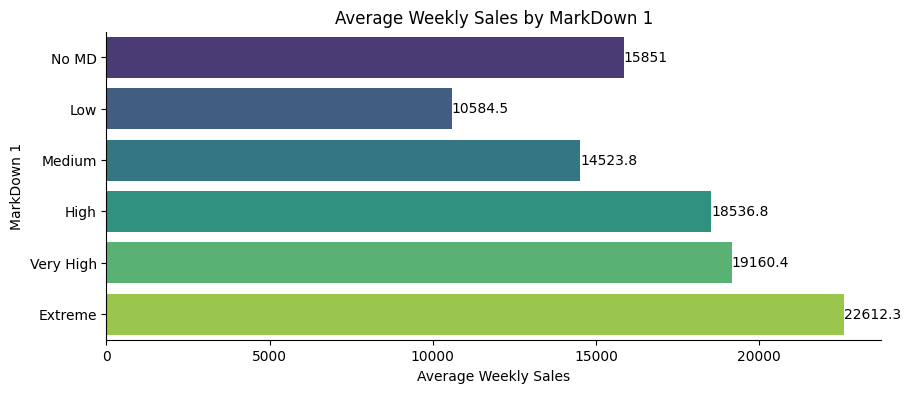

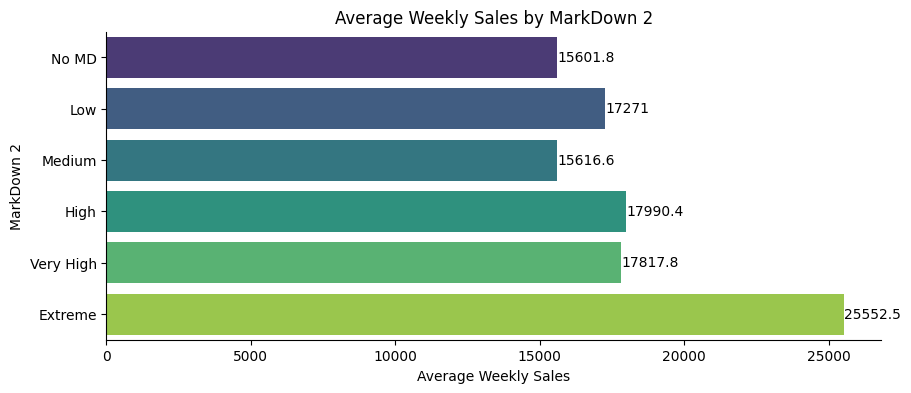

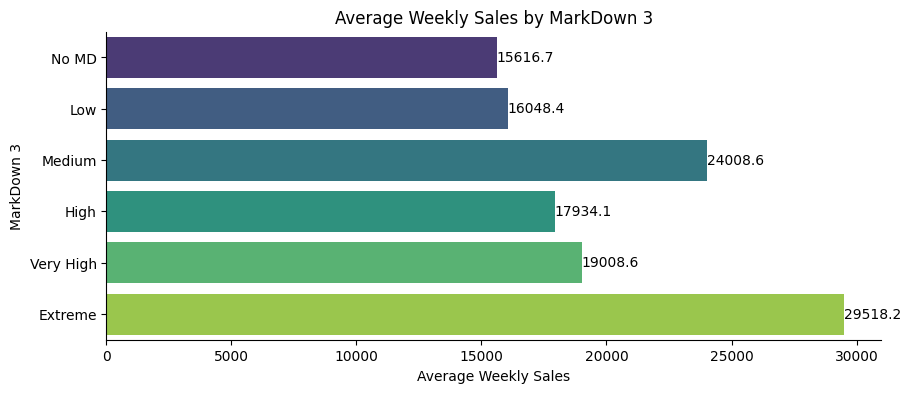

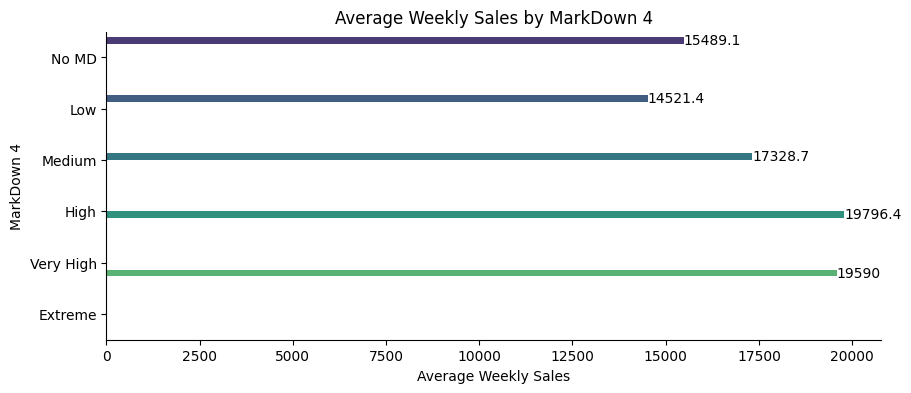

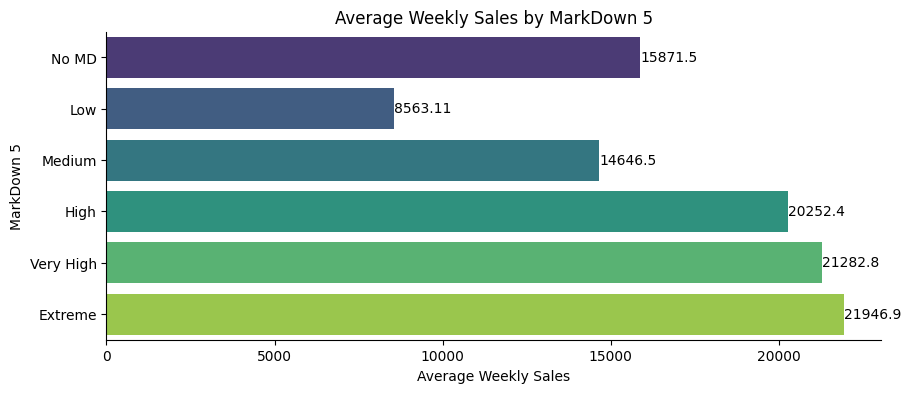

In [87]:
bin_columns = ['MD1_bin','MD2_bin', 'MD3_bin', 'MD4_bin', 'MD5_bin']
for i,col in enumerate(bin_columns, 1):
    
    md_effect = df_sales.groupby(col, observed = True)['Weekly_Sales'].mean()
    plt.figure(figsize = (10,4))
    ax = sns.barplot(y =md_effect.index, x = md_effect.values, hue=md_effect.index, legend = False, palette='viridis')
    for container in ax.containers:
        ax.bar_label(container, fontsize=10);
    for s in ['top', 'right']:
        ax.spines[s].set_visible(False)
    plt.title(f'Average Weekly Sales by MarkDown {i}')
    plt.ylabel(f'MarkDown {i}')
    plt.xlabel('Average Weekly Sales')
    plt.show()

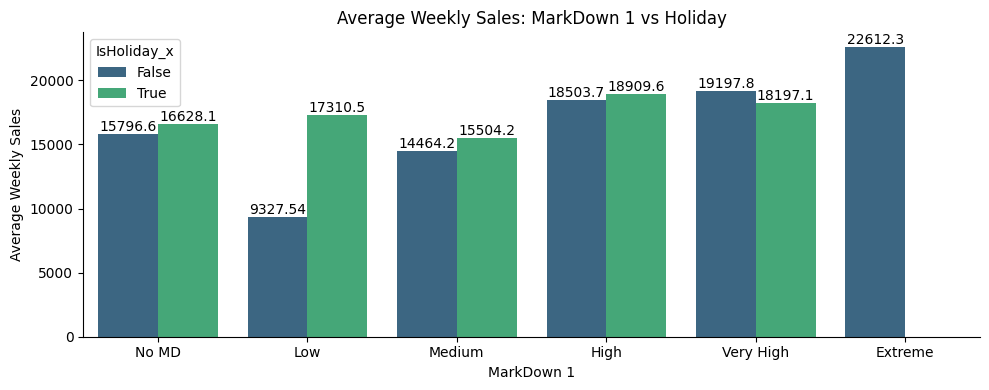

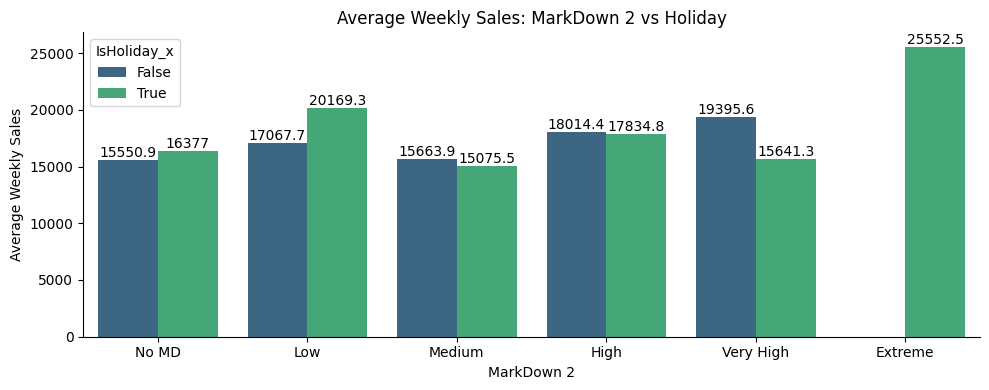

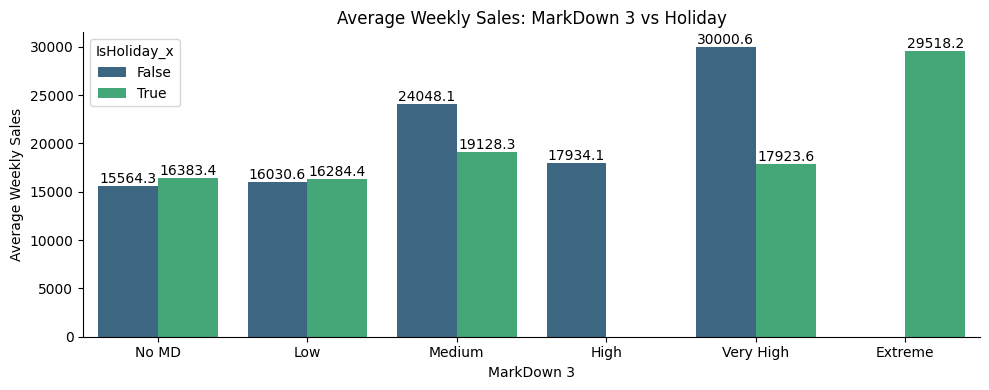

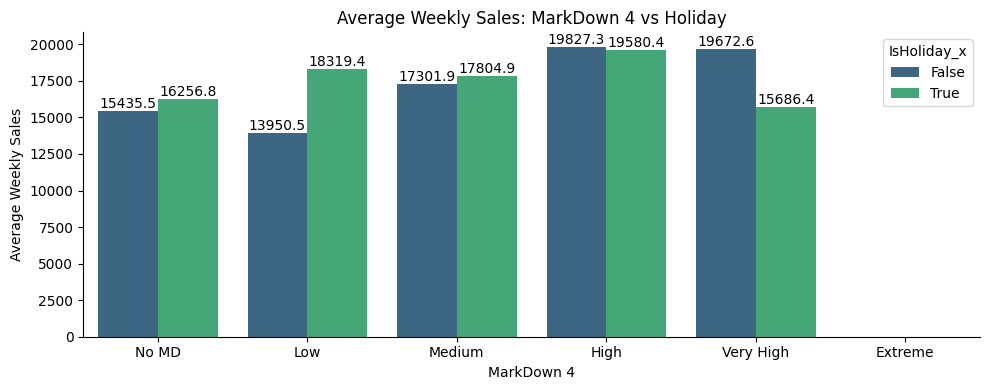

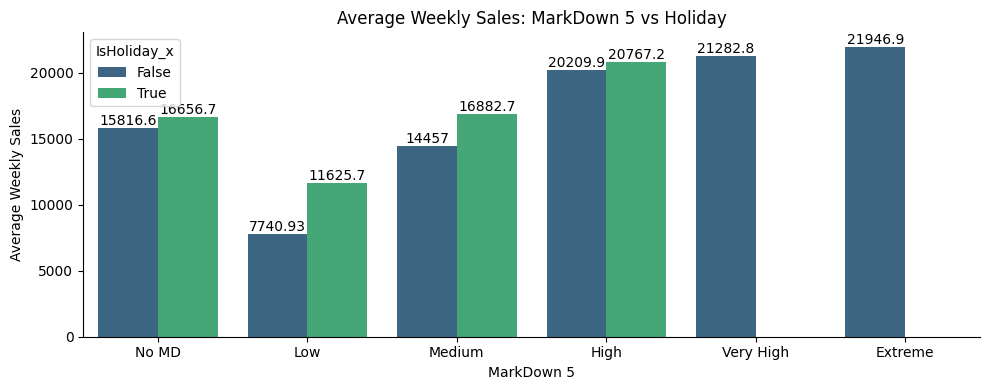

In [88]:
for i,col in enumerate(bin_columns, 1):
    markdown_holiday = df_sales.groupby([col, 'IsHoliday_x'], observed = True)['Weekly_Sales'].mean().reset_index()
    plt.figure(figsize=(10,4))
    ax = sns.barplot(
        data=markdown_holiday,
        x=col,
        y='Weekly_Sales',
        hue='IsHoliday_x',
        palette='viridis'
        )
    for container in ax.containers:
        ax.bar_label(container, fontsize=10);
    plt.title(f'Average Weekly Sales: MarkDown {i} vs Holiday')
    plt.xlabel(f'MarkDown {i}')
    plt.ylabel('Average Weekly Sales')
    for s in ['top', 'right']:
        ax.spines[s].set_visible(False)
    plt.tight_layout()
    plt.show()

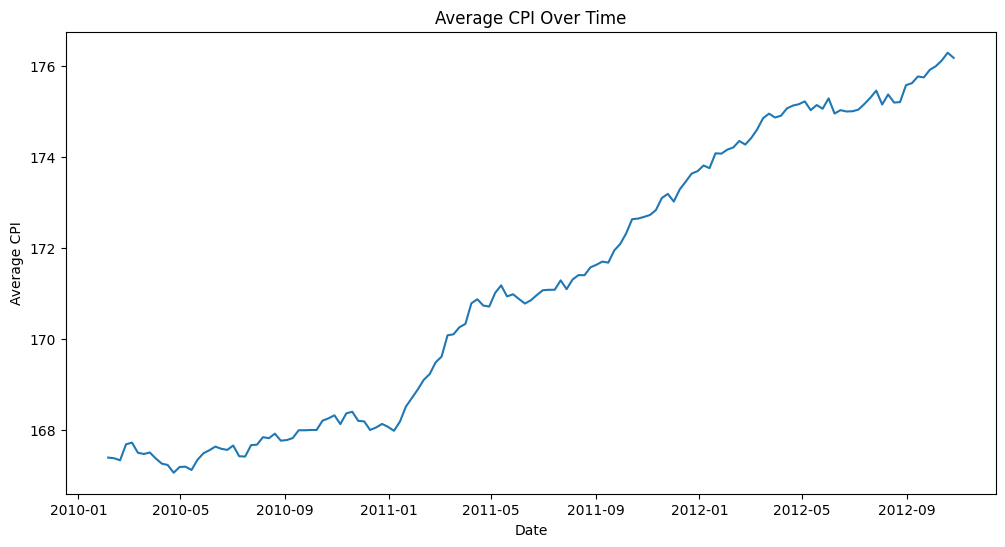

In [89]:
cpi_mean = df_sales.groupby('Date')['CPI'].mean().reset_index()
plt.figure(figsize = (12,6))
sns.lineplot(data = cpi_mean, x = 'Date', y = 'CPI')
plt.title('Average CPI Over Time')
plt.xlabel('Date')
plt.ylabel('Average CPI')
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
plt.show()

In [90]:
bins=[120, 140, 160, 180, 200, 220, 240]
labels=['120–140','140–160','160–180','180–200','200–220','220–240']
df_sales['cpi_bin'] = pd.cut(df_sales['CPI'], bins = bins, labels = labels)

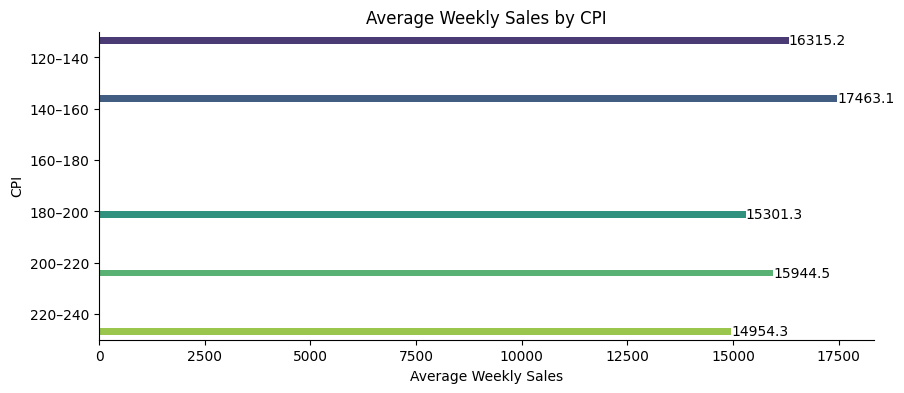

In [91]:
cpi_effect = df_sales.groupby('cpi_bin', observed = True)['Weekly_Sales'].mean()
plt.figure(figsize = (10,4))
ax = sns.barplot(y =cpi_effect.index, x = cpi_effect.values, hue=cpi_effect.index, legend = False, palette='viridis')
for container in ax.containers:
    ax.bar_label(container, fontsize=10);

plt.title('Average Weekly Sales by CPI')
plt.ylabel('CPI')
plt.xlabel('Average Weekly Sales')
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
plt.show()

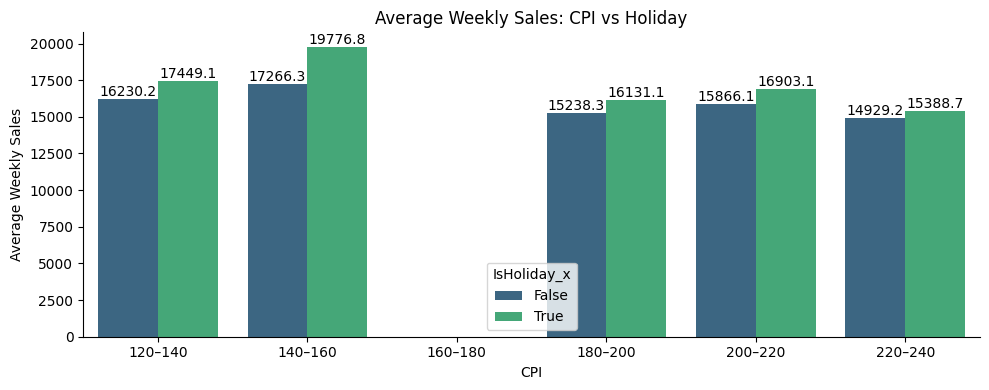

In [92]:
cpi_holiday = df_sales.groupby(['cpi_bin', 'IsHoliday_x'], observed = True)['Weekly_Sales'].mean().reset_index()
plt.figure(figsize=(10,4))
ax = sns.barplot(
    data=cpi_holiday,
    x='cpi_bin',
    y='Weekly_Sales',
    hue='IsHoliday_x',
    palette='viridis'
    )
for container in ax.containers:
    ax.bar_label(container, fontsize=10);
plt.title('Average Weekly Sales: CPI vs Holiday')
plt.xlabel('CPI')
plt.ylabel('Average Weekly Sales')
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
plt.tight_layout()
plt.show()